In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
import tensorflow as tf
import tensorflow.contrib.learn as learn
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.image as img

C:\Users\amey\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\amey\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\amey\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\amey\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [2]:
cr = pd.read_csv(r"C:/Users/amey/Desktop/assign2/XYZCorp_LendingData.csv", sep='\t')    
# using separator /t to deal with an issue of delimiter

C:\Users\amey\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [184]:
cr_back = pd.read_csv(r"C:/Users/amey/Desktop/assign2/XYZCorp_LendingData.csv", sep='\t')    
# a backup for later insights

C:\Users\amey\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



# Data Cleaning, Feature Selection and Feature engineering

Feature selection is done in three stages 
1. Involves deleting largely na columns, immaterial columns
2. Involves selection based on chi-square method
3. Involves model based feature selection (selecting most significant features for a particular model to improve the model)


In [3]:
cr.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
cr.describe(include = "all")

# to get some statistical properties of the data, featurewise like mean, median etc.

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969,855969.000000,855969.000000,855969,855969,...,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,600221,NaN,NaN,247998,54958,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,NaN,13.192320,436.238072,NaN,NaN,...,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,NaN,4.368365,243.726876,NaN,NaN,...,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,NaN,5.320000,15.690000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,NaN,9.990000,260.550000,NaN,NaN,...,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,NaN,12.990000,382.550000,NaN,NaN,...,75.000000,1.000000,2.000000,4485.500000,62.100000,2.380000e+04,0.000000,0.000000,2.000000,0.000000
75%,5.446311e+07,5.803559e+07,20000.000000,20000.000000,20000.000000,NaN,15.990000,571.560000,NaN,NaN,...,87.500000,2.000000,4.000000,7701.250000,75.300000,3.990000e+04,1.000000,2.000000,3.000000,0.000000


In [5]:
cr.shape
# to get the size of the data

(855969, 73)

In [6]:
# So data has 73 columns and 855969 rows.

In [7]:
cr.isnull().sum() 
# To understand which columns have how many null values 

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49439
emp_length                          0
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
desc                           734156
purpose                             0
title                              32
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_l

In [8]:
# some columns have more than 98% null values, so we will eliminate columns consisting of more than 85% null values


In [9]:
# to see which variables have only one value
one_val_cols=[]
for i in range(0,len(cr.columns.values)):
    if cr.iloc[:,i].value_counts().shape == (1,):
        one_val_cols.append(cr.columns.values[i])    

one_val_cols        

['policy_code']

In [10]:
# So dropping these two types of columns

In [11]:
cr.drop(['annual_inc_joint', 'dti_joint','verification_status_joint','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','inq_fi','total_cu_tl','inq_last_12m','desc','mths_since_last_record','policy_code'],axis=1,inplace= True)


 Now to deal rest of the variables with na values, if the variables is categorical we will fill it with value with mose entries
 if the variable is continuous we will fill it with mean of all values

In [12]:
cr.isnull().sum() 
# To understand which columns have how many null values 

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49439
emp_length                          0
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
purpose                             0
title                              32
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_last_delinq         439812
open_acc    

In [13]:
cr.emp_title.value_counts()
# to see which categores have how many entries

Teacher                                     12965
Manager                                     10821
Registered Nurse                             5341
RN                                           5182
Owner                                        5157
Supervisor                                   4792
Sales                                        4051
Project Manager                              3856
Driver                                       3417
Office Manager                               3404
Director                                     3067
General Manager                              3060
manager                                      2994
teacher                                      2820
owner                                        2727
Engineer                                     2574
President                                    2478
driver                                       2319
Vice President                               2283
Attorney                                     2074


In [14]:
cr.emp_title = cr.emp_title.astype('category')
# converting to categorical variable

In [15]:
cr.emp_title=cr.emp_title.fillna('Teacher')
# filling na values with value with most entries 

In [16]:
cr.title.value_counts()


Debt consolidation                          398089
Credit card refinancing                     159228
Home improvement                             38633
Other                                        30522
Debt Consolidation                           15469
Major purchase                               11519
Medical expenses                              6408
Business                                      6325
Car financing                                 5372
Consolidation                                 5266
debt consolidation                            4718
Debt Consolidation Loan                       3744
Moving and relocation                         3724
Vacation                                      3640
Credit Card Consolidation                     2326
Home buying                                   2229
consolidation                                 2120
Personal Loan                                 2057
Consolidation Loan                            1743
Home Improvement               

In [17]:
cr.title=cr.title.fillna('Debt consolidation')
# filling na values with value with most entries

In [18]:
cr.mths_since_last_delinq.value_counts()


9.0      8248
6.0      8089
12.0     8038
13.0     7999
8.0      7979
7.0      7919
10.0     7849
14.0     7708
15.0     7671
11.0     7516
16.0     7278
17.0     7254
18.0     7233
21.0     7035
19.0     6993
20.0     6871
22.0     6826
25.0     6737
23.0     6613
26.0     6603
5.0      6589
24.0     6545
27.0     6495
28.0     6494
29.0     6395
30.0     6262
31.0     6142
33.0     6087
32.0     6075
34.0     5986
         ... 
133.0       3
146.0       3
129.0       2
117.0       2
119.0       2
130.0       2
141.0       2
111.0       2
149.0       2
123.0       2
148.0       2
127.0       2
142.0       1
140.0       1
124.0       1
156.0       1
125.0       1
188.0       1
180.0       1
126.0       1
171.0       1
136.0       1
143.0       1
176.0       1
157.0       1
137.0       1
139.0       1
154.0       1
151.0       1
159.0       1
Name: mths_since_last_delinq, dtype: int64

In [19]:
cr.mths_since_last_delinq=cr.mths_since_last_delinq.fillna(9)
# filling na values with value with most entries

In [20]:
cr.revol_util.value_counts()


0.00      3361
58.00     1723
53.00     1702
59.00     1694
61.00     1684
57.00     1666
62.00     1658
60.00     1644
63.00     1643
52.00     1635
55.00     1634
54.00     1619
47.00     1611
48.00     1604
65.00     1597
50.00     1584
56.00     1575
64.00     1561
66.00     1561
46.00     1559
51.00     1558
49.00     1543
44.00     1524
68.00     1524
67.00     1519
70.00     1513
72.00     1501
69.00     1484
43.00     1451
42.00     1450
          ... 
26.33        1
136.10       1
25.74        1
121.40       1
110.90       1
88.48        1
0.01         1
137.20       1
36.94        1
5.33         1
57.56        1
119.20       1
13.56        1
193.00       1
62.31        1
108.70       1
8.46         1
38.77        1
37.73        1
118.80       1
0.49         1
23.11        1
60.69        1
0.86         1
1.88         1
153.00       1
125.60       1
152.50       1
17.78        1
120.80       1
Name: revol_util, dtype: int64

In [21]:
cr.revol_util=cr.revol_util.fillna(np.mean(cr.revol_util))
# filling na values with mean

In [22]:
cr.last_pymnt_d=cr.last_pymnt_d.fillna('Jan-2016')

In [23]:
cr.next_pymnt_d=cr.next_pymnt_d.fillna('Feb-2016')

In [24]:
cr.last_credit_pull_d=cr.last_credit_pull_d.fillna('Jan-2016')

In [25]:
cr.collections_12_mths_ex_med=cr.collections_12_mths_ex_med.fillna(0)

In [26]:
cr.mths_since_last_major_derog=cr.mths_since_last_major_derog.fillna(45.0)

In [27]:
cr.tot_coll_amt=cr.tot_coll_amt.fillna(0)

In [28]:
cr.tot_cur_bal=cr.tot_cur_bal.fillna(0.0)

In [29]:
cr.total_rev_hi_lim=cr.total_rev_hi_lim.fillna(15000.0)

In [30]:
cr.isnull().sum() 
# To understand which columns have how many null values 

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
pymnt_plan                     0
purpose                        0
title                          0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc 

Now that null values are dealt with. Now we will drop the x-variables with no influence on target variables 
and factor the categorical data.


In [31]:
issue_d=cr.issue_d   # since this column is needed for sampling, saving it in another vaiable for sampling test and train later


In [32]:
cr.drop(['id','member_id','issue_d','zip_code','addr_state','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d'],axis=1,inplace= True)


In [33]:
cr.shape


(855969, 44)

So we are left with 44 columns

Now to convert text data into numeric data we will use label encoding

In [34]:
le = LabelEncoder()

cr.term = le.fit_transform(cr.term)

cr.grade = le.fit_transform(cr.grade)

cr.sub_grade = le.fit_transform(cr.sub_grade)

cr.emp_title = le.fit_transform(cr.emp_title)

cr.emp_length = le.fit_transform(cr.emp_length)

cr.home_ownership = le.fit_transform(cr.home_ownership)

cr.verification_status = le.fit_transform(cr.verification_status)

cr.pymnt_plan = le.fit_transform(cr.pymnt_plan)

cr.purpose = le.fit_transform(cr.purpose)

cr.title = le.fit_transform(cr.title)

cr.initial_list_status = le.fit_transform(cr.initial_list_status)

cr.application_type = le.fit_transform(cr.application_type)


# Exploratory data analysis

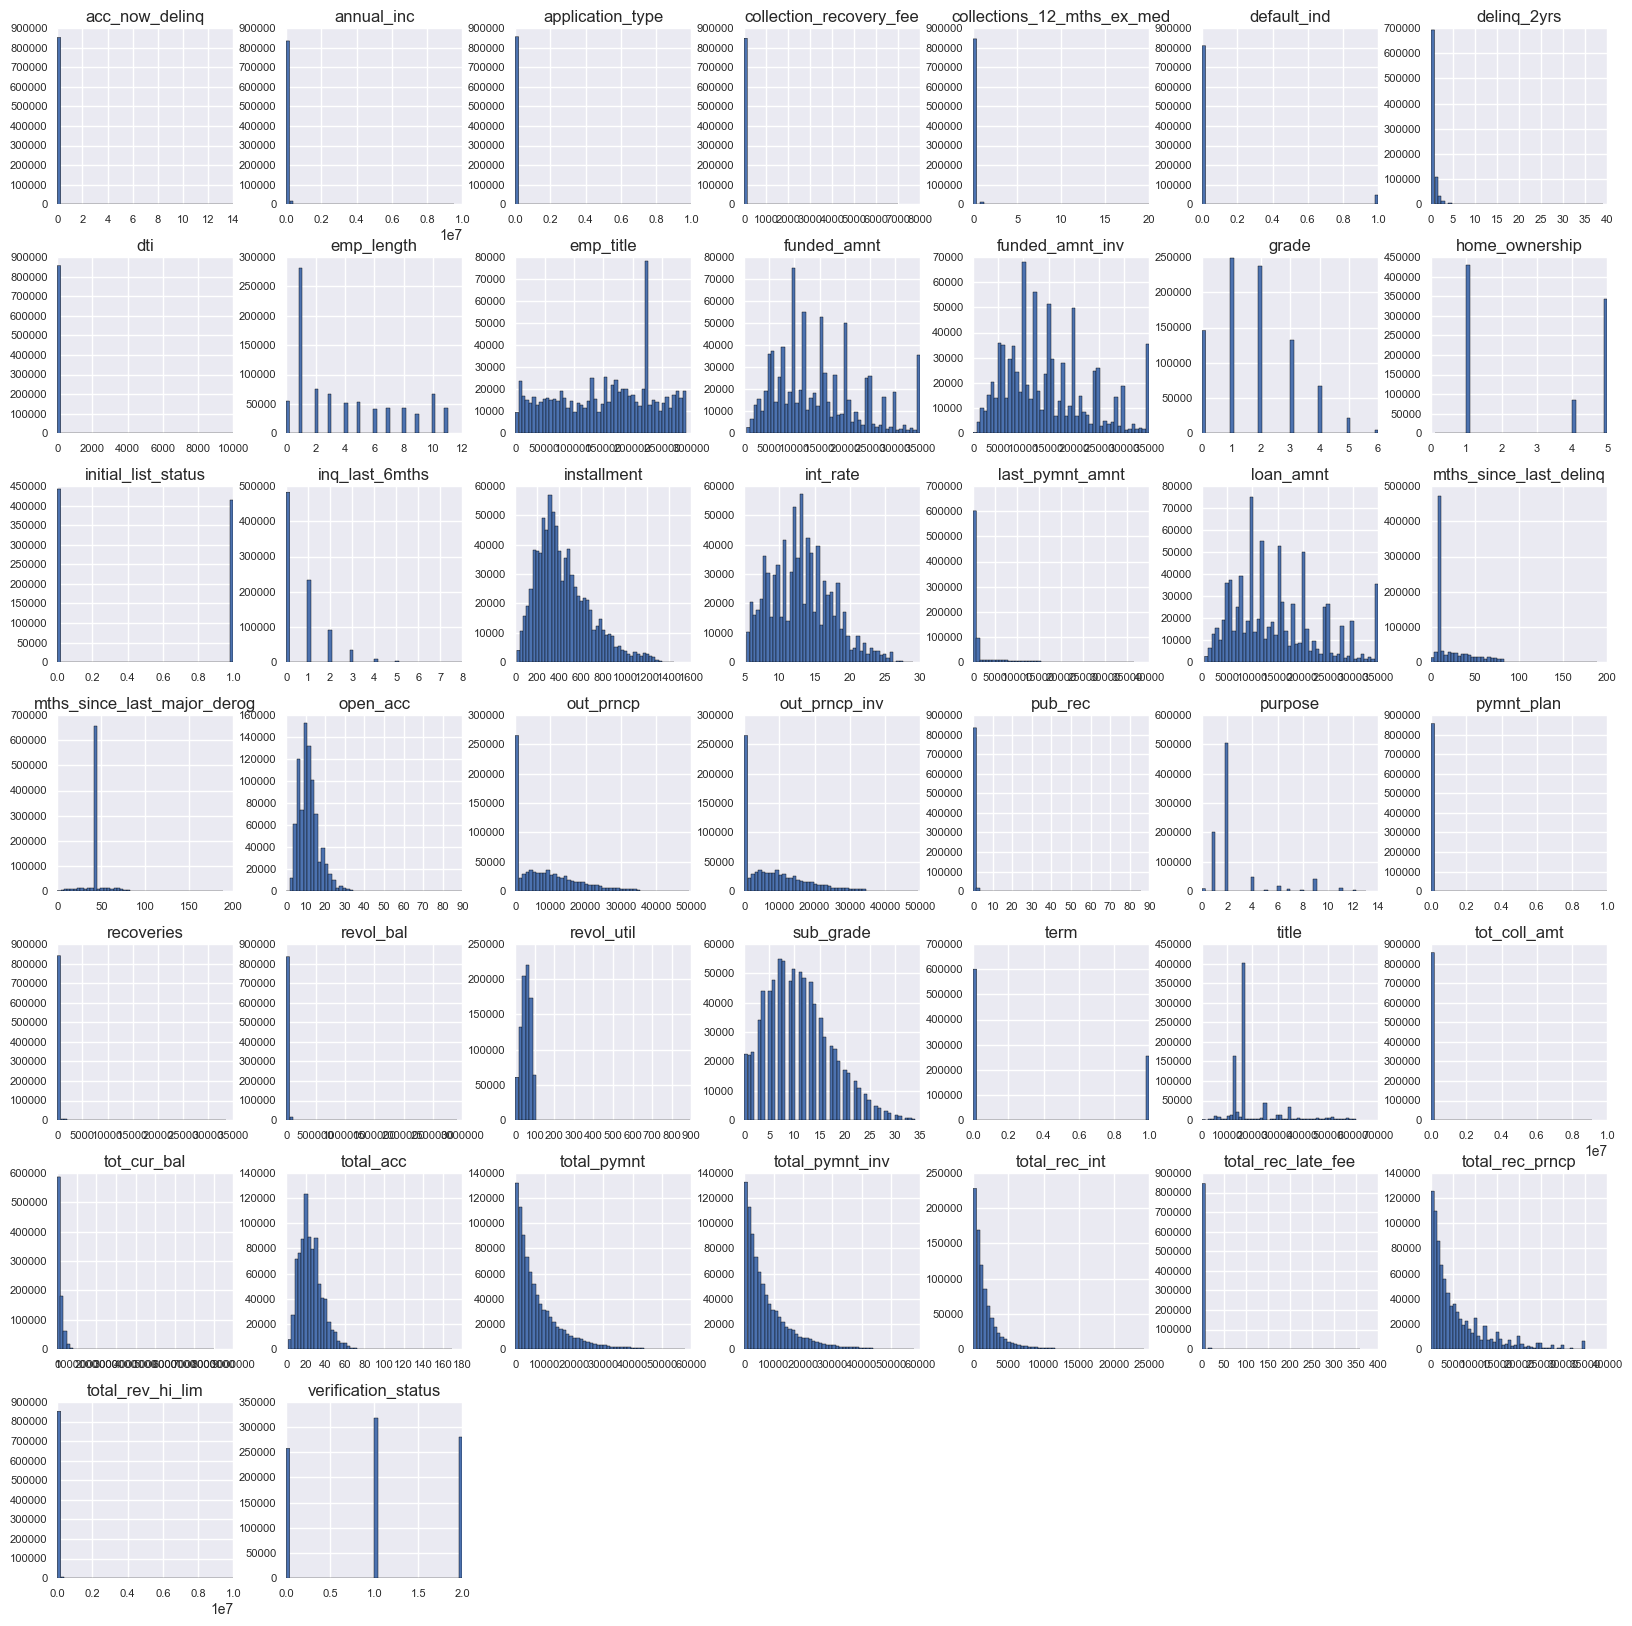

In [35]:
cr.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

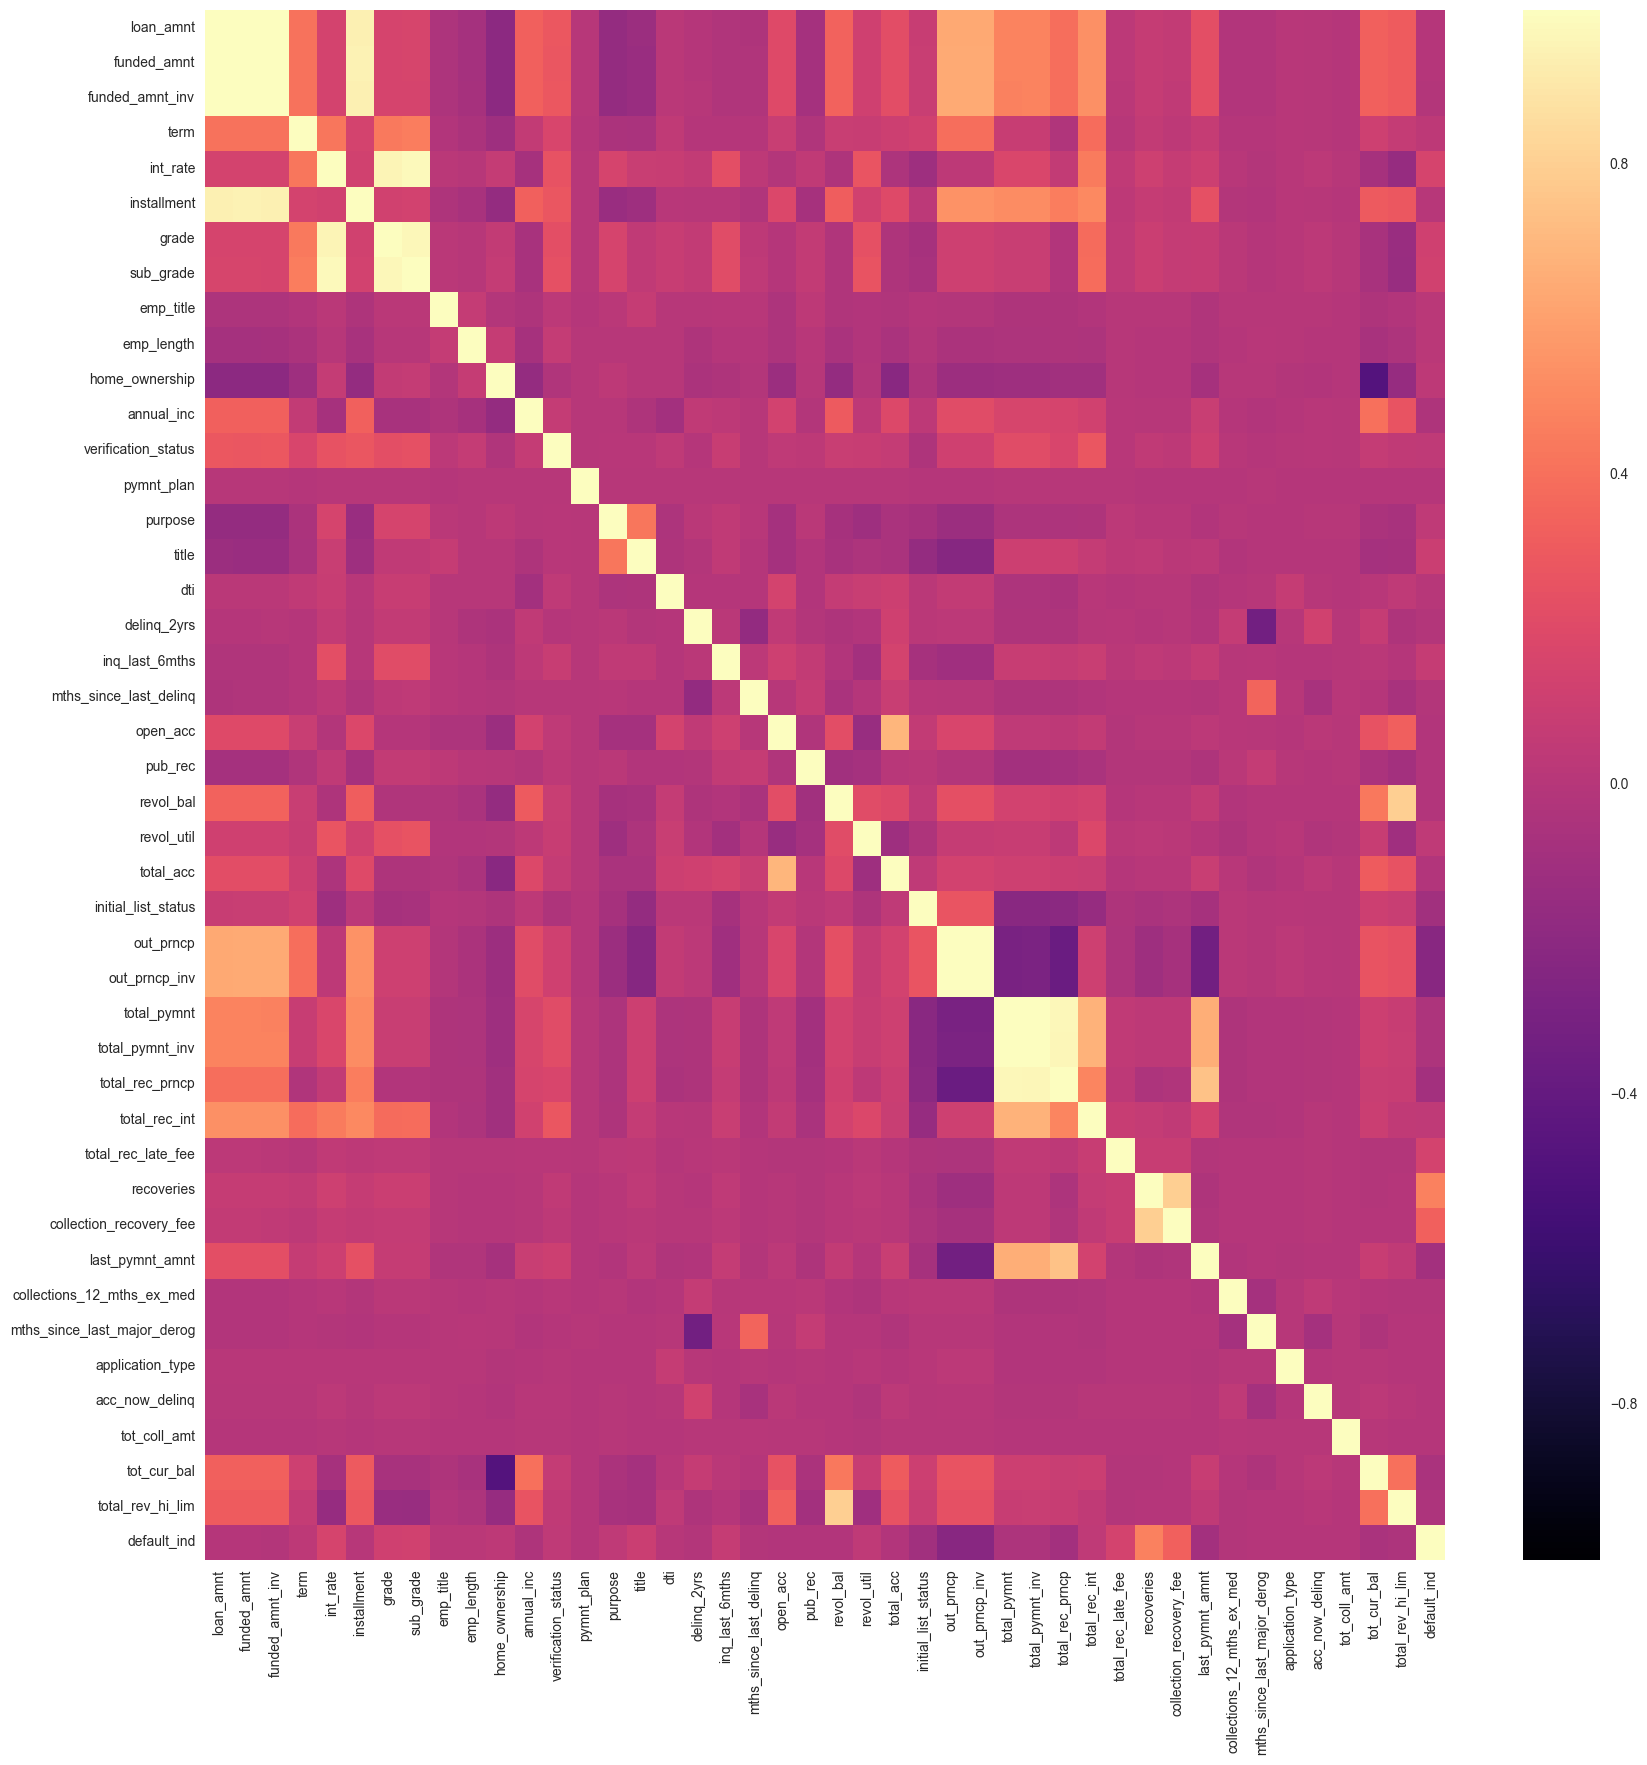

In [36]:
# Correlation based data visualization
plt.figure(figsize=(20,20))
sns.heatmap(cr.corr(),annot=False,cmap='magma')
plt.show()

In [37]:
# target variable analysis
cr.default_ind.value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

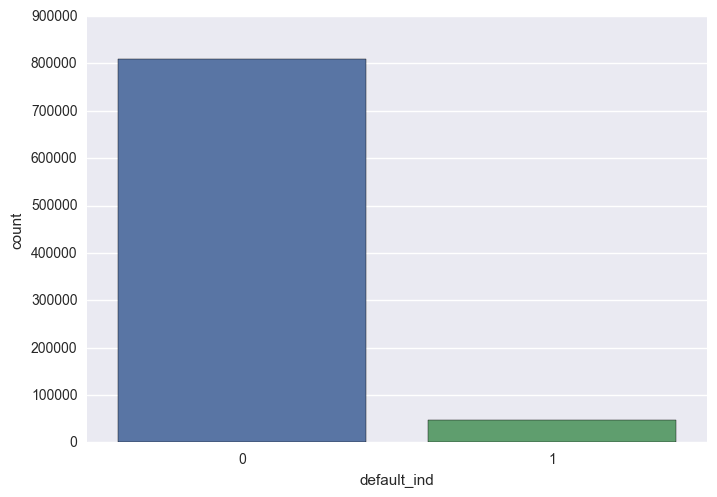

In [38]:
# Target Variable analysis
sns.countplot('default_ind',data=cr)
plt.show()
# Hence the target variable has high class imbalance, hence over and undesrsampling will have to be done before building models

 This is the second stage of feature selection that involves chi square method based feature selection

In [39]:
# Splitting x variables and target variable
cr_x = cr.iloc[:,0:43]
cr_y = cr.iloc[:,-1]
test = SelectKBest(score_func = chi2, k = 'all')
fitted_cr = test.fit(cr_x,cr_y)
print(fitted_cr.scores_)   # for each xvar we get a score. higher the score more important is the xvar
scores = fitted_cr.scores_.tolist()
cr_x.columns   # list of the column names


[9.92127317e+04 1.38398843e+05 2.78564495e+05 5.90947354e+02
 2.97608508e+04 2.63317999e+03 1.25306822e+04 5.28845559e+04
 9.99063477e+06 6.42877321e+02 1.14186933e+03 6.46967586e+07
 8.20392820e+02 2.87009791e-01 3.27224820e+03 5.29430519e+07
 2.81238056e+02 1.70295119e+02 6.46811049e+03 1.97958659e+03
 9.83743914e+02 5.72128792e+02 1.07075249e+07 1.74390331e+04
 2.10400369e+03 4.32100240e+03 3.77726777e+08 3.77569208e+08
 1.07622836e+07 1.13018308e+07 5.32163754e+07 4.48191674e+06
 6.91474487e+05 7.02191231e+08 7.38319230e+07 6.92298240e+07
 1.21999643e+02 5.92935085e+01 2.53716655e+01 1.00540817e+01
 2.49689576e+06 5.84078154e+08 7.53246310e+07]


Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan',
       'purpose', 'title', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim'],
      dtype='object')

In [40]:
# To get the list of variables with most score 
features = {"feature" : cr_x.columns, "scores" : scores}
features = pd.DataFrame(features)
features.sort_values(['scores'],ascending=False)


,feature,scores
33,recoveries,7.021912e+08
41,tot_cur_bal,5.840782e+08
26,out_prncp,3.777268e+08
27,out_prncp_inv,3.775692e+08
42,total_rev_hi_lim,7.532463e+07
34,collection_recovery_fee,7.383192e+07
35,last_pymnt_amnt,6.922982e+07
11,annual_inc,6.469676e+07
30,total_rec_prncp,5.321638e+07
15,title,5.294305e+07



scores lie in the range [0,7.021912e+08]
At this point it is hard to tell how many top features will give good model

so we will build model on three data frames
1. One with x-var with significance > 5*e+07, also top 10 x-var
2. One with x-var with significance > e+05, also top 20 x-var
3. One with all the x-variables in cr_x data frame

after building models we will see which features give best model 


In [41]:
# Top 10 variables
cr_x1=cr_x.loc[:,["recoveries","tot_cur_bal","out_prncp","out_prncp_inv","total_rev_hi_lim","collection_recovery_fee","last_pymnt_amnt","annual_inc","total_rec_prncp","title"]]

# Top 20 variables
cr_x2=cr_x.loc[:,["recoveries","tot_cur_bal","out_prncp","out_prncp_inv","total_rev_hi_lim","collection_recovery_fee","last_pymnt_amnt","annual_inc","total_rec_prncp","title","total_pymnt_inv","total_pymnt","revol_bal","emp_title","total_rec_int","tot_coll_amt","total_rec_late_fee","funded_amnt_inv","funded_amnt","loan_amnt"]]

# All the variables
cr_x3=cr_x


# Analysis on the first set


# Sampling
 test data is supposed to have data after Jun 15 and the rest will be train data


In [120]:
test=[]
train=[]
for i in range(0,len(issue_d)):
    if issue_d[i] in ["Jun-2015","Jul-2015","Aug-2015","Sep-2015","Oct-2015","Nov-2015","Dec-2015"]:
        test.append(i)
    else :
        train.append(i)

# first set of x variables
cr_x1_test=cr_x1.iloc[test,]
cr_x1_train=cr_x1.iloc[train,]


In [121]:
# target variable
cr_y_test=cr_y.iloc[test,]
cr_y_train=cr_y.iloc[train,]

column_names=list(cr_x1_train.columns.values)


Since target variable has very high class imbalance over or undersampling is needed.
The reason it is done after test and train split and not during data cleaning is that 
over and undersampling is done always on the train data.
We built models on both over and undersampled data, but the undersampled data gives poor models also doing undersampling 
reduces the data to around 10% of its original size.
So we will proceed with oversampling


In [122]:
# for oversampling we make use of SMOTE function from imblearn package
sm = SMOTE(random_state=42)
cr_x1_train,cr_y_train = sm.fit_sample(cr_x1_train,cr_y_train)
cr_x1_train.shape,cr_y_train.shape

cr_x1_train = pd.DataFrame(cr_x1_train)
cr_x1_train.columns = column_names

# Here the random_state=42 is like set.seed and it puts a fix on sampling.
# random_state=42 ensures that the sampling is consistent throughout the model building process

###################################################################
# Model Building 

List of models :
1. Logistic regression
2. Decision tree
3. Random forest
4. Naive Bias
5. K-Nearest Neighbor(KNN) Classifier
6. AdaBoostClassifier
7. VotingClassifier
8. Neural Networks

Model evaluation and comparison will be done primarily on the basis of confusion matrix, TPr, FPr, ROC curve and AUROC, 
Other measures such as precision, recall, f1-score, support will also be considered. Since the business problem is about 
predicting probability of default, we will give extra focus on precision for class 1 of "default_ind" i.e. the target variable.
###################################################################

 Logistic regression

C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix = 
[[248969   7711]
 [    62    249]]
TPr =  0.8006430868167203
FPr =  0.030041296556023063
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    256680
           1       0.03      0.80      0.06       311

    accuracy                           0.97    256991
   macro avg       0.52      0.89      0.52    256991
weighted avg       1.00      0.97      0.98    256991



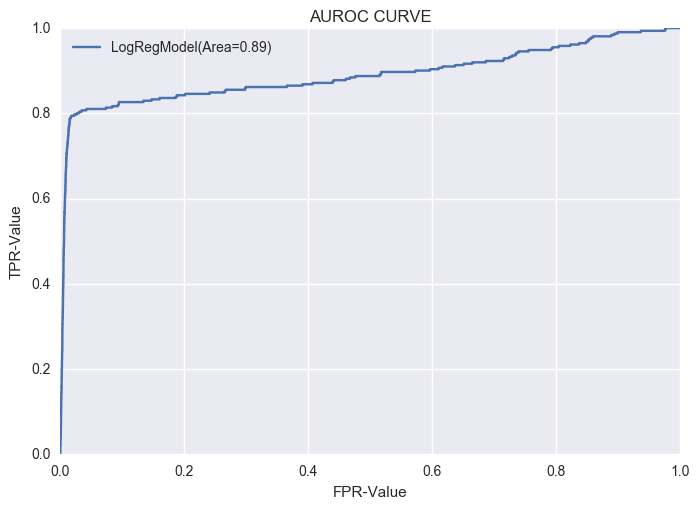

In [123]:
# Logistic regression
logmodel = LogisticRegression()

logmodel.fit(cr_x1_train,cr_y_train)


#### Prediction and Model evaluation

pred_value = logmodel.predict(cr_x1_test)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = logmodel.predict_proba(cr_x1_test)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="LogRegModel(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()


In the representation of confusion matrix, we have used the documentation on sklearn website to maintain consistency as we use 
sklearn codes.

Although accuracy is high, the precision for class 1 is very low(3%). So we will do model based feature selection and build a model on the most significant features

C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix = 
[[249108   7572]
 [    61    250]]
TPr =  0.8038585209003215
FPr =  0.029499766245909304
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    256680
           1       0.03      0.80      0.06       311

    accuracy                           0.97    256991
   macro avg       0.52      0.89      0.52    256991
weighted avg       1.00      0.97      0.98    256991



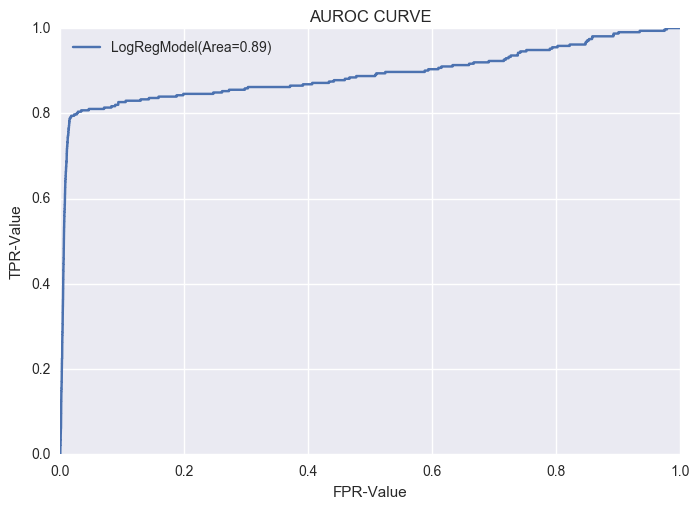

In [47]:
# Selecting top 9 variables
selector = RFE(logmodel, 9, step=1)
selector = selector.fit(cr_x1_train,cr_y_train)
selector.support_ 
xvars=list(cr_x1_train.columns)
sel_vars=[]
for i in range(0,len(selector.support_)) :
    if list(selector.support_)[i]==True :
        sel_vars.append(xvars[i]) 
sel_vars
cr_x1_train_1=cr_x1_train.loc[:,sel_vars]
cr_x1_test_1=cr_x1_test.loc[:,sel_vars]

logmodel1 = LogisticRegression()

logmodel1.fit(cr_x1_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = logmodel1.predict(cr_x1_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = logmodel1.predict_proba(cr_x1_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="LogRegModel(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()

C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix = 
[[250776   5904]
 [    65    246]]
TPr =  0.7909967845659164
FPr =  0.02300140252454418
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    256680
           1       0.04      0.79      0.08       311

    accuracy                           0.98    256991
   macro avg       0.52      0.88      0.53    256991
weighted avg       1.00      0.98      0.99    256991



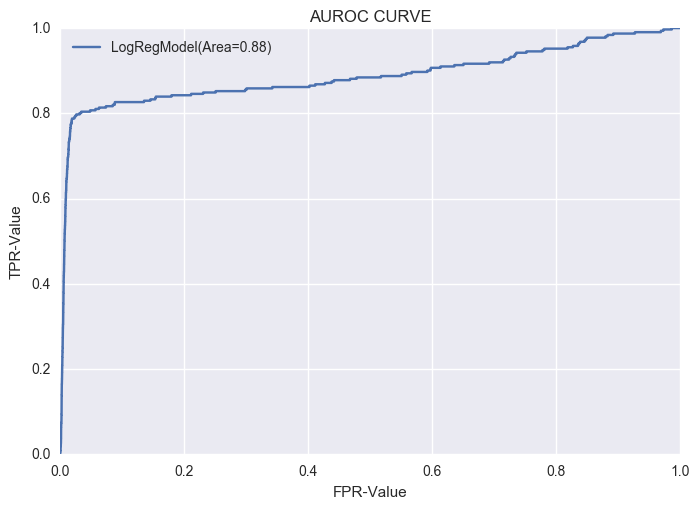

In [48]:
# Selecting top 8 variables
selector = RFE(logmodel, 8, step=1)
selector = selector.fit(cr_x1_train,cr_y_train)
selector.support_ 
xvars=list(cr_x1_train.columns)
sel_vars=[]
for i in range(0,len(selector.support_)) :
    if list(selector.support_)[i]==True :
        sel_vars.append(xvars[i]) 
sel_vars
cr_x1_train_1=cr_x1_train.loc[:,sel_vars]
cr_x1_test_1=cr_x1_test.loc[:,sel_vars]

logmodel1 = LogisticRegression()

logmodel1.fit(cr_x1_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = logmodel1.predict(cr_x1_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = logmodel1.predict_proba(cr_x1_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="LogRegModel(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()

C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Confusion Matrix = 
[[252497   4183]
 [    68    243]]
TPr =  0.7813504823151125
FPr =  0.01629655602306374
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    256680
           1       0.05      0.78      0.10       311

    accuracy                           0.98    256991
   macro avg       0.53      0.88      0.55    256991
weighted avg       1.00      0.98      0.99    256991



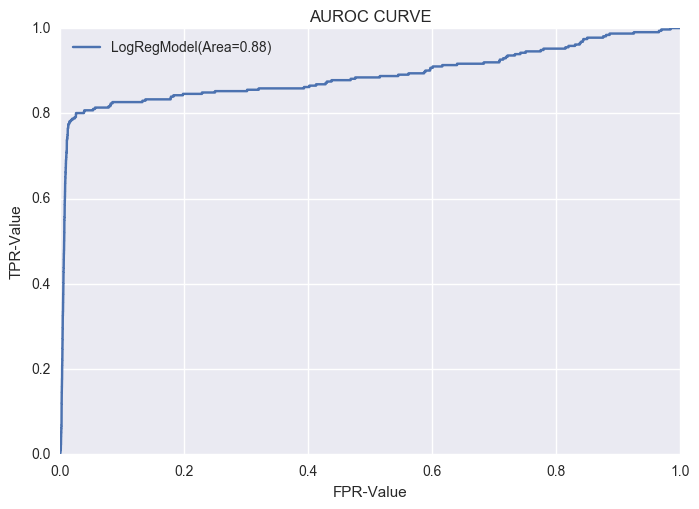

In [49]:
# Selecting top 7 variables
selector = RFE(logmodel, 7, step=1)
selector = selector.fit(cr_x1_train,cr_y_train)
selector.support_ 
xvars=list(cr_x1_train.columns)
sel_vars=[]
for i in range(0,len(selector.support_)) :
    if list(selector.support_)[i]==True :
        sel_vars.append(xvars[i]) 
sel_vars
cr_x1_train_1=cr_x1_train.loc[:,sel_vars]
cr_x1_test_1=cr_x1_test.loc[:,sel_vars]

logmodel1 = LogisticRegression()

logmodel1.fit(cr_x1_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = logmodel1.predict(cr_x1_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = logmodel1.predict_proba(cr_x1_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="LogRegModel(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()

C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Confusion Matrix = 
[[256680      0]
 [   237     74]]
TPr =  0.2379421221864952
FPr =  0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       1.00      0.24      0.38       311

    accuracy                           1.00    256991
   macro avg       1.00      0.62      0.69    256991
weighted avg       1.00      1.00      1.00    256991



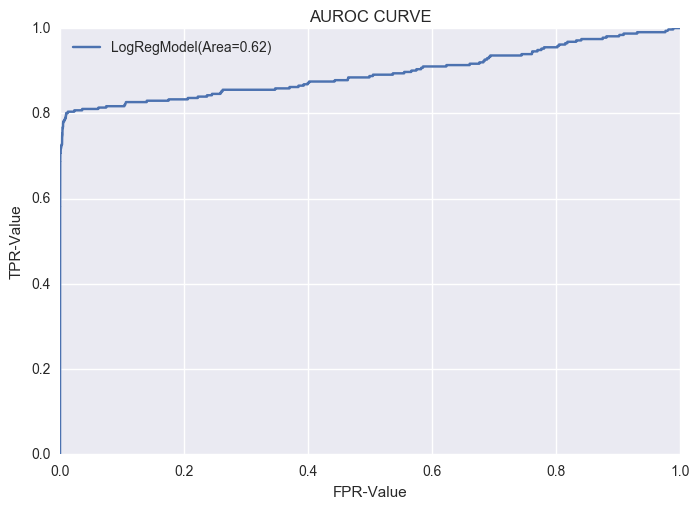

In [50]:
# Selecting top 6 variables
selector = RFE(logmodel, 6, step=1)
selector = selector.fit(cr_x1_train,cr_y_train)
selector.support_ 
xvars=list(cr_x1_train.columns)
sel_vars=[]
for i in range(0,len(selector.support_)) :
    if list(selector.support_)[i]==True :
        sel_vars.append(xvars[i]) 
sel_vars
cr_x1_train_1=cr_x1_train.loc[:,sel_vars]
cr_x1_test_1=cr_x1_test.loc[:,sel_vars]

logmodel1 = LogisticRegression()

logmodel1.fit(cr_x1_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = logmodel1.predict(cr_x1_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = logmodel1.predict_proba(cr_x1_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="LogRegModel(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()

Hence when we go below 7 variables we get bad model. So we conclude that till this point we conclude that logistic regression 
with 7 variables is the best model. But still we still have the problem of very low precision on class 1.

Decision tree

Confusion Matrix = 
[[ 95625 161055]
 [     6    305]]
TPr =  0.9807073954983923
FPr =  0.6274544179523142
              precision    recall  f1-score   support

           0       1.00      0.37      0.54    256680
           1       0.00      0.98      0.00       311

    accuracy                           0.37    256991
   macro avg       0.50      0.68      0.27    256991
weighted avg       1.00      0.37      0.54    256991



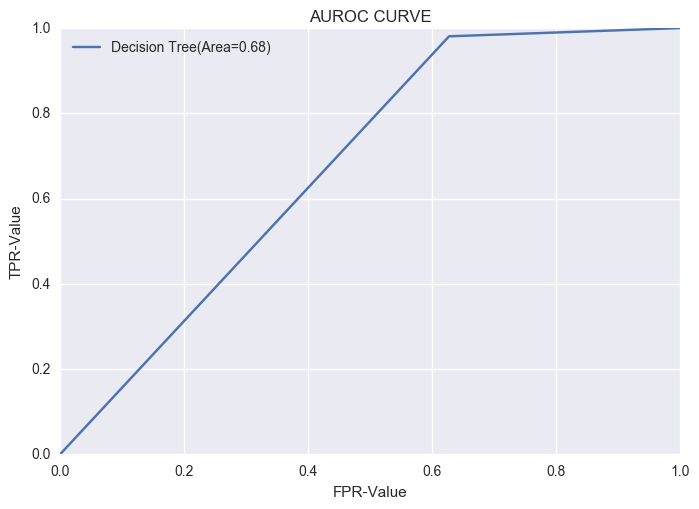

In [51]:

dtree  = DecisionTreeClassifier()

dtree.fit(cr_x1_train,cr_y_train)

pred_value = dtree.predict(cr_x1_test)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = dtree.predict_proba(cr_x1_test)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Decision Tree(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



Decision tree is not giving good results so we will see if feature reduction improves the model.

Confusion Matrix = 
[[ 96208 160472]
 [     6    305]]
TPr =  0.9807073954983923
FPr =  0.6251831073710457
              precision    recall  f1-score   support

           0       1.00      0.37      0.55    256680
           1       0.00      0.98      0.00       311

    accuracy                           0.38    256991
   macro avg       0.50      0.68      0.27    256991
weighted avg       1.00      0.38      0.54    256991



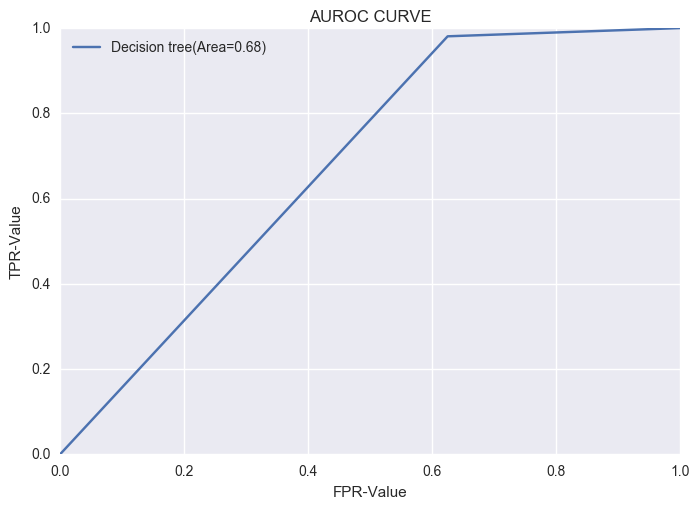

In [73]:
# Selecting top 9 variables
dtree.feature_importances_

top_9 = np.argpartition(dtree.feature_importances_, -9)[-9:]

cr_x1_train_1=cr_x1_train.iloc[:,top_9]

cr_x1_test_1=cr_x1_test.iloc[:,top_9]

dtree1  = DecisionTreeClassifier()

dtree1.fit(cr_x1_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = dtree1.predict(cr_x1_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = dtree1.predict_proba(cr_x1_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Decision tree(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



Confusion Matrix = 
[[ 94930 161750]
 [     8    303]]
TPr =  0.9742765273311897
FPr =  0.630162069502883
              precision    recall  f1-score   support

           0       1.00      0.37      0.54    256680
           1       0.00      0.97      0.00       311

    accuracy                           0.37    256991
   macro avg       0.50      0.67      0.27    256991
weighted avg       1.00      0.37      0.54    256991



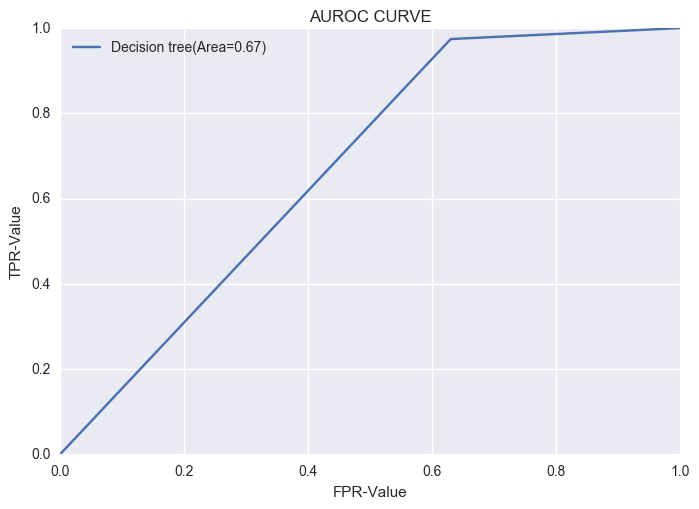

In [74]:
# Selecting top 8 variables
dtree.feature_importances_

top_8 = np.argpartition(dtree.feature_importances_, -8)[-8:]

cr_x1_train_1=cr_x1_train.iloc[:,top_8]

cr_x1_test_1=cr_x1_test.iloc[:,top_8]

dtree1  = DecisionTreeClassifier()

dtree1.fit(cr_x1_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = dtree1.predict(cr_x1_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = dtree1.predict_proba(cr_x1_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Decision tree(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()


Confusion Matrix = 
[[ 89245 167435]
 [     8    303]]
TPr =  0.9742765273311897
FPr =  0.6523102695963846
              precision    recall  f1-score   support

           0       1.00      0.35      0.52    256680
           1       0.00      0.97      0.00       311

    accuracy                           0.35    256991
   macro avg       0.50      0.66      0.26    256991
weighted avg       1.00      0.35      0.52    256991



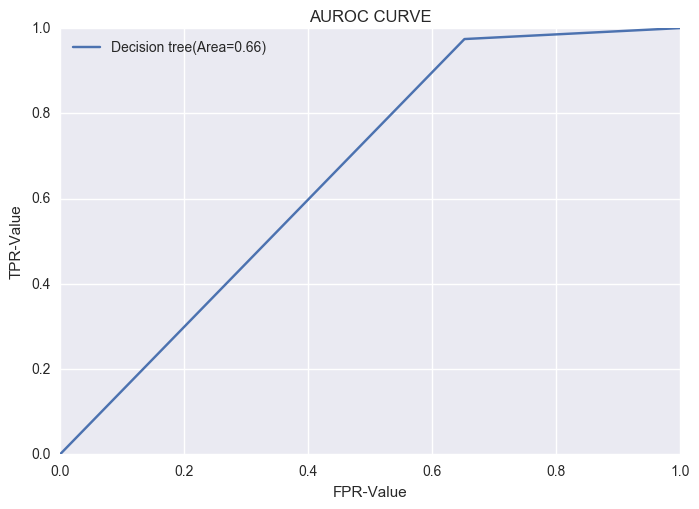

In [75]:
# Selecting top 7 variables
dtree.feature_importances_

top_7 = np.argpartition(dtree.feature_importances_, -7)[-7:]

cr_x1_train_1=cr_x1_train.iloc[:,top_7]

cr_x1_test_1=cr_x1_test.iloc[:,top_7]

dtree1  = DecisionTreeClassifier()

dtree1.fit(cr_x1_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = dtree1.predict(cr_x1_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = dtree1.predict_proba(cr_x1_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Decision tree(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()


Confusion Matrix = 
[[ 88033 168647]
 [     8    303]]
TPr =  0.9742765273311897
FPr =  0.6570321022284557
              precision    recall  f1-score   support

           0       1.00      0.34      0.51    256680
           1       0.00      0.97      0.00       311

    accuracy                           0.34    256991
   macro avg       0.50      0.66      0.26    256991
weighted avg       1.00      0.34      0.51    256991



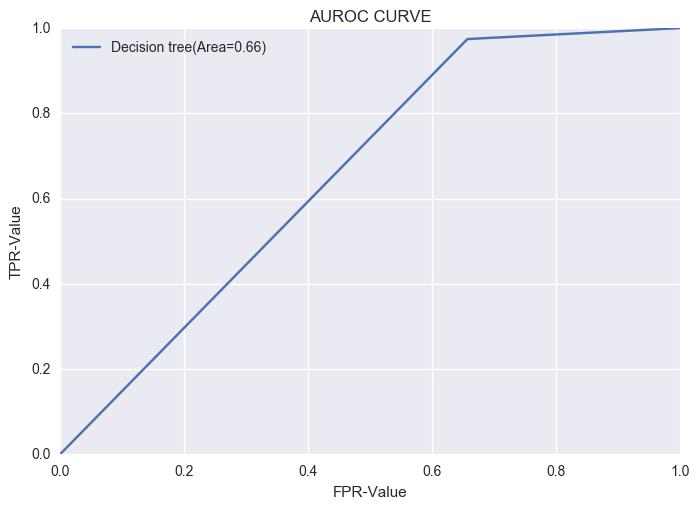

In [76]:
# Selecting top 6 variables
dtree.feature_importances_

top_6 = np.argpartition(dtree.feature_importances_, -6)[-6:]

cr_x1_train_1=cr_x1_train.iloc[:,top_6]

cr_x1_test_1=cr_x1_test.iloc[:,top_6]

dtree1  = DecisionTreeClassifier()

dtree1.fit(cr_x1_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = dtree1.predict(cr_x1_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = dtree1.predict_proba(cr_x1_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Decision tree(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()


Hence selecting most significant features are not improving decision tree. So decision tree is not correct model for this particular
data set.

Random forest

C:\Users\amey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix = 
[[127269 129411]
 [    10    301]]
TPr =  0.9678456591639871
FPr =  0.5041725105189341
              precision    recall  f1-score   support

           0       1.00      0.50      0.66    256680
           1       0.00      0.97      0.00       311

    accuracy                           0.50    256991
   macro avg       0.50      0.73      0.33    256991
weighted avg       1.00      0.50      0.66    256991



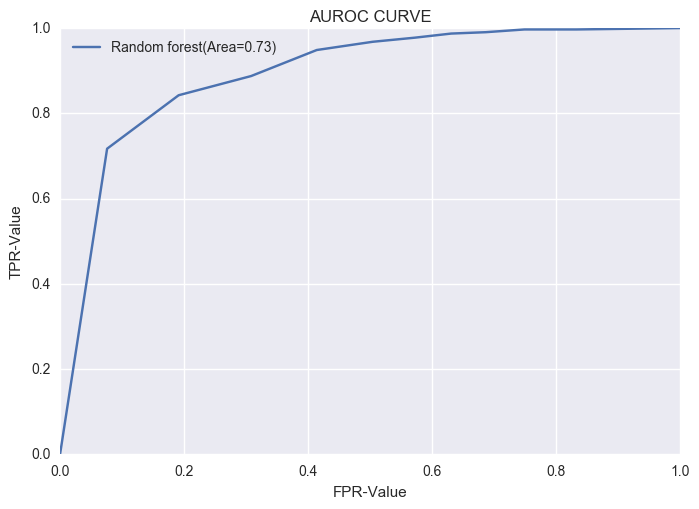

In [91]:

RFC = RandomForestClassifier()

RFC.fit(cr_x1_train,cr_y_train)


#### Prediction and Model evaluation

pred_value = RFC.predict(cr_x1_test)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = RFC.predict_proba(cr_x1_test)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Random forest(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()


C:\Users\amey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix = 
[[115880 140800]
 [    10    301]]
TPr =  0.9678456591639871
FPr =  0.5485429328346579
              precision    recall  f1-score   support

           0       1.00      0.45      0.62    256680
           1       0.00      0.97      0.00       311

    accuracy                           0.45    256991
   macro avg       0.50      0.71      0.31    256991
weighted avg       1.00      0.45      0.62    256991



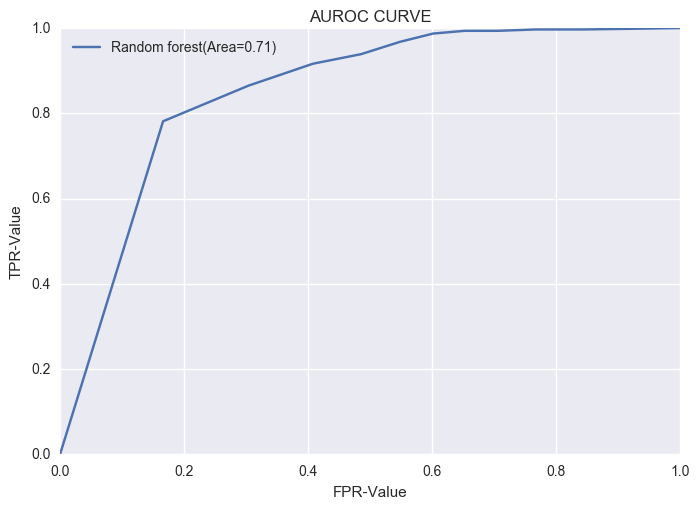

In [92]:
RFC.feature_importances_
top_9 = np.argpartition(RFC.feature_importances_, -9)[-9:]

cr_x1_train_1=cr_x1_train.iloc[:,top_9]
cr_x1_test_1=cr_x1_test.iloc[:,top_9]

RFC1 = RandomForestClassifier()

RFC1.fit(cr_x1_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = RFC1.predict(cr_x1_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = RFC1.predict_proba(cr_x1_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Random forest(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()

C:\Users\amey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix = 
[[116280 140400]
 [     7    304]]
TPr =  0.977491961414791
FPr =  0.5469845722300141
              precision    recall  f1-score   support

           0       1.00      0.45      0.62    256680
           1       0.00      0.98      0.00       311

    accuracy                           0.45    256991
   macro avg       0.50      0.72      0.31    256991
weighted avg       1.00      0.45      0.62    256991



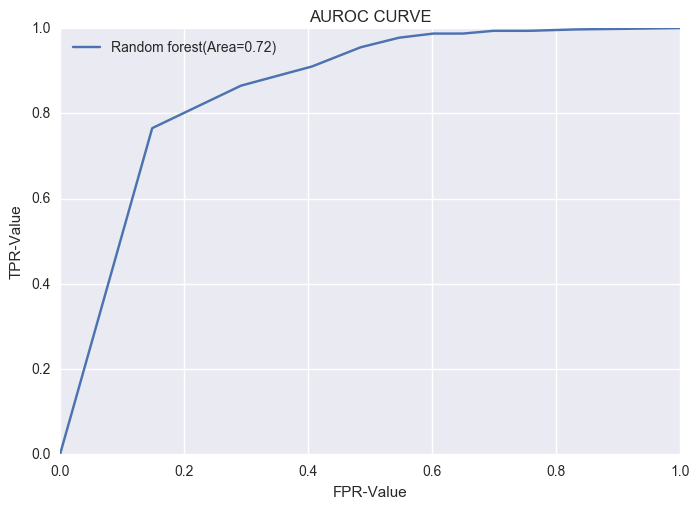

In [93]:
RFC.feature_importances_
top_8 = np.argpartition(RFC.feature_importances_, -8)[-8:]

cr_x1_train_1=cr_x1_train.iloc[:,top_8]
cr_x1_test_1=cr_x1_test.iloc[:,top_8]

RFC1 = RandomForestClassifier()

RFC1.fit(cr_x1_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = RFC1.predict(cr_x1_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = RFC1.predict_proba(cr_x1_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Random forest(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()

C:\Users\amey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix = 
[[101509 155171]
 [     4    307]]
TPr =  0.9871382636655949
FPr =  0.6045309334580021
              precision    recall  f1-score   support

           0       1.00      0.40      0.57    256680
           1       0.00      0.99      0.00       311

    accuracy                           0.40    256991
   macro avg       0.50      0.69      0.29    256991
weighted avg       1.00      0.40      0.57    256991



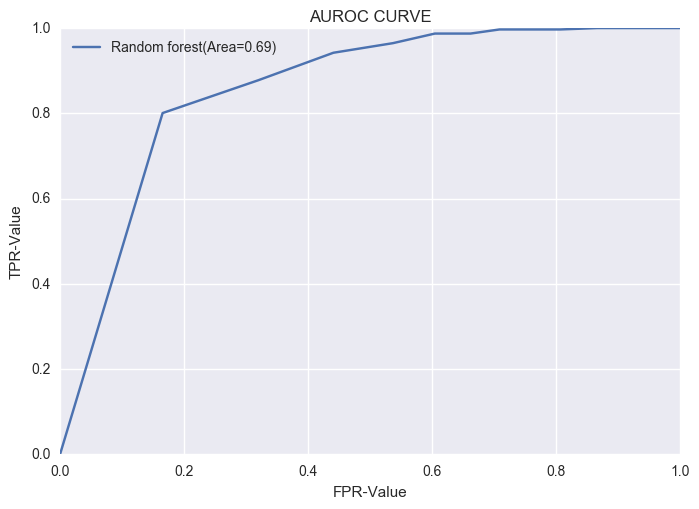

In [94]:
RFC.feature_importances_
top_7 = np.argpartition(RFC.feature_importances_, -7)[-7:]

cr_x1_train_1=cr_x1_train.iloc[:,top_7]
cr_x1_test_1=cr_x1_test.iloc[:,top_7]

RFC1 = RandomForestClassifier()

RFC1.fit(cr_x1_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = RFC1.predict(cr_x1_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = RFC1.predict_proba(cr_x1_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Random forest(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()

C:\Users\amey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix = 
[[ 67939 188741]
 [     3    308]]
TPr =  0.9903536977491961
FPr =  0.7353163472027427
              precision    recall  f1-score   support

           0       1.00      0.26      0.42    256680
           1       0.00      0.99      0.00       311

    accuracy                           0.27    256991
   macro avg       0.50      0.63      0.21    256991
weighted avg       1.00      0.27      0.42    256991



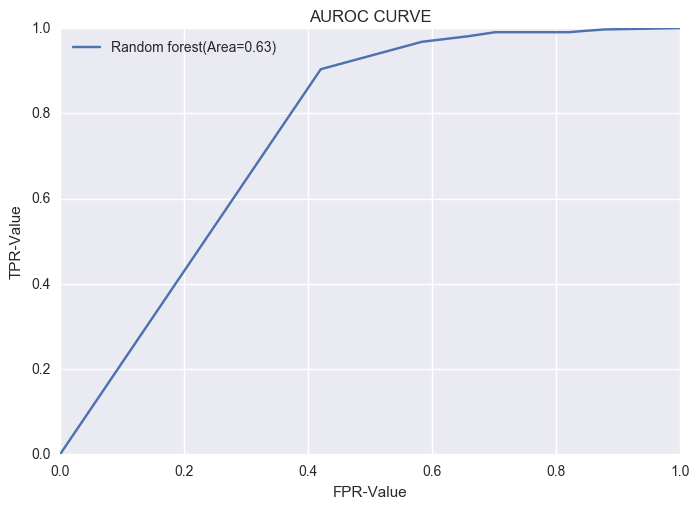

In [95]:
RFC.feature_importances_
top_6 = np.argpartition(RFC.feature_importances_, -6)[-6:]

cr_x1_train_1=cr_x1_train.iloc[:,top_6]
cr_x1_test_1=cr_x1_test.iloc[:,top_6]

RFC1 = RandomForestClassifier()

RFC1.fit(cr_x1_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = RFC1.predict(cr_x1_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = RFC1.predict_proba(cr_x1_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Random forest(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()

Hence feature selection is not making model better hence random forest is not correct model for this particular data

Naive Bias

Confusion Matrix = 
[[248920   7760]
 [    72    239]]
TPr =  0.7684887459807074
FPr =  0.03023219573009194
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    256680
           1       0.03      0.77      0.06       311

    accuracy                           0.97    256991
   macro avg       0.51      0.87      0.52    256991
weighted avg       1.00      0.97      0.98    256991



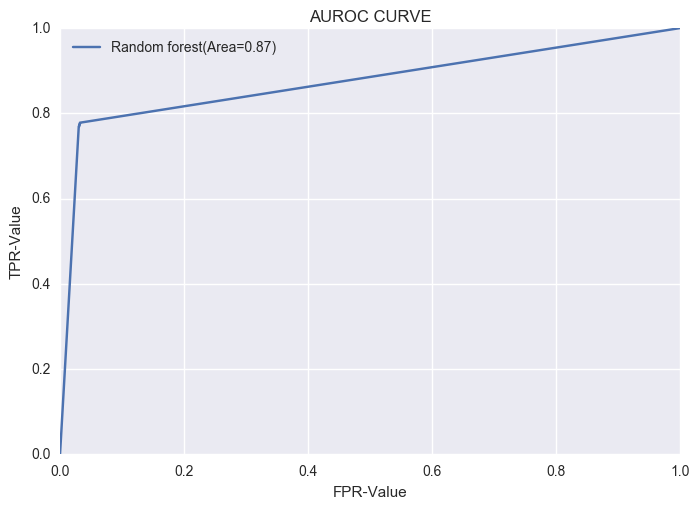

In [102]:

NB = MultinomialNB()

NB.fit(cr_x1_train,cr_y_train)

pred_value = NB.predict(cr_x1_test)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = NB.predict_proba(cr_x1_test)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Random forest(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



KNeighborsClassifier

Confusion Matrix = 
[[245458  11222]
 [    79    232]]
TPr =  0.7459807073954984
FPr =  0.043719806763285025
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    256680
           1       0.02      0.75      0.04       311

    accuracy                           0.96    256991
   macro avg       0.51      0.85      0.51    256991
weighted avg       1.00      0.96      0.98    256991



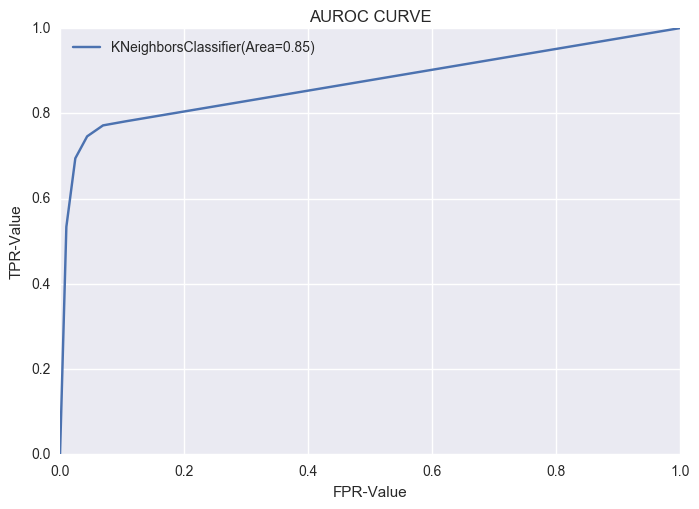

In [100]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(cr_x1_train,cr_y_train)


#### Prediction and Model evaluation

pred_value = knn.predict(cr_x1_test)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = knn.predict_proba(cr_x1_test)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="KNeighborsClassifier(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()

Adaptive boosting

Confusion Matrix = 
[[ 95462 161218]
 [     8    303]]
TPr =  0.9742765273311897
FPr =  0.6280894498987065
              precision    recall  f1-score   support

           0       1.00      0.37      0.54    256680
           1       0.00      0.97      0.00       311

    accuracy                           0.37    256991
   macro avg       0.50      0.67      0.27    256991
weighted avg       1.00      0.37      0.54    256991



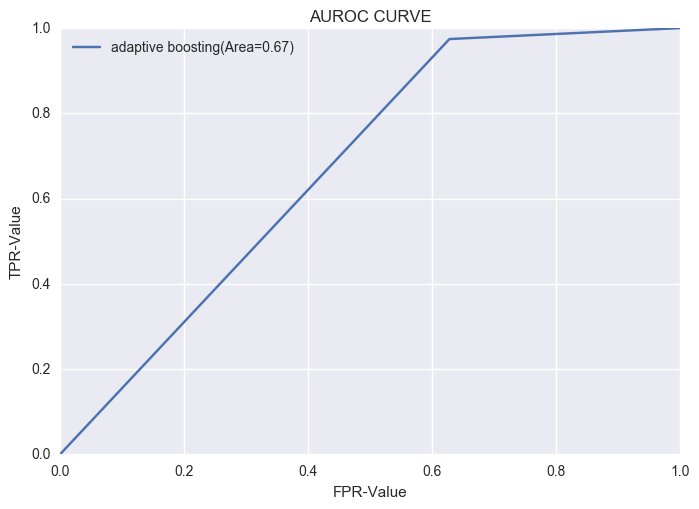

In [102]:

abc = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 15) 

abc.fit(cr_x1_train,cr_y_train)


#### Prediction and Model evaluation

pred_value = abc.predict(cr_x1_test)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = abc.predict_proba(cr_x1_test)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="adaptive boosting(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()

Voting classifier

In [105]:
# voting hard

logmodel = LogisticRegression()
dtree = DecisionTreeClassifier()
rfc = RandomForestClassifier()

vc = VotingClassifier(estimators = [("logmodel",logmodel),("dtree",dtree),("rfc",rfc)],voting='hard')

vc.fit(cr_x1_train,cr_y_train)


#### Prediction and Model evaluation

pred_value = vc.predict(cr_x1_test)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve



C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix = 
[[134226 122454]
 [    11    300]]
TPr =  0.9646302250803859
FPr =  0.4770687237026648
              precision    recall  f1-score   support

           0       1.00      0.52      0.69    256680
           1       0.00      0.96      0.00       311

    accuracy                           0.52    256991
   macro avg       0.50      0.74      0.35    256991
weighted avg       1.00      0.52      0.69    256991



0.7437807506888607

In [109]:
# voting soft

logmodel = LogisticRegression()
dtree = DecisionTreeClassifier()
rfc = RandomForestClassifier()

vc = VotingClassifier(estimators = [("logmodel",logmodel),("dtree",dtree),("rfc",rfc)],voting='soft')

vc.fit(cr_x1_train,cr_y_train)


#### Prediction and Model evaluation

pred_value = vc.predict(cr_x1_test)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))



C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix = 
[[115310 141370]
 [     8    303]]
TPr =  0.9742765273311897
FPr =  0.5507635966962755
              precision    recall  f1-score   support

           0       1.00      0.45      0.62    256680
           1       0.00      0.97      0.00       311

    accuracy                           0.45    256991
   macro avg       0.50      0.71      0.31    256991
weighted avg       1.00      0.45      0.62    256991



Neural Networks

W0930 15:48:10.146884  4920 estimator.py:453] Using temporary folder as model directory: C:\Users\amey\AppData\Local\Temp\tmpyucuoxek
W0930 15:48:10.254959  4920 data_feeder.py:283] float64 is not supported by many models, consider casting to float32.
W0930 15:48:10.834343  4920 head.py:2027] Casting <dtype: 'int32'> labels to bool.
W0930 15:48:11.026472  4920 head.py:2027] Casting <dtype: 'int32'> labels to bool.
W0930 15:48:11.139548  4920 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0930 15:48:11.173572  4920 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0930 15:48:14.616398  4920 data_feeder.py:283] float64 is not supported by many models, consider casting to float32.


Confusion Matrix = 
[[241446  15234]
 [   242     69]]
TPr =  0.22186495176848875
FPr =  0.05935016362786349


W0930 15:48:16.960962  4920 data_feeder.py:283] float64 is not supported by many models, consider casting to float32.


              precision    recall  f1-score   support

           0       1.00      0.94      0.97    256680
           1       0.00      0.22      0.01       311

    accuracy                           0.94    256991
   macro avg       0.50      0.58      0.49    256991
weighted avg       1.00      0.94      0.97    256991



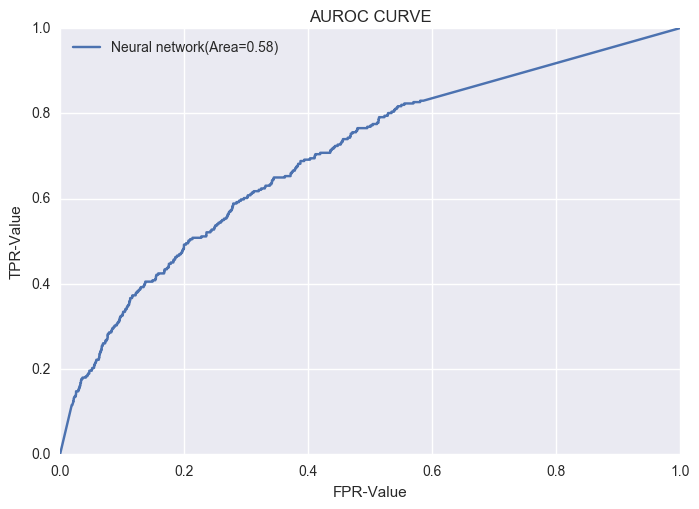

In [108]:

feature_columns = [tf.contrib.layers.real_valued_column("",dimension=1)]

classifier = learn.DNNClassifier(feature_columns=feature_columns,hidden_units=[10,20,10],n_classes=2)
# [10,20,10] means 10 neurons in input layer, 20 in hidden layer and 10 in output layer.

cr_y_train = cr_y_train.astype(int)   # NN requires inputs in int format

classifier.fit(cr_x1_train,cr_y_train,steps=500,batch_size=32)    

#### Prediction and Model evaluation

pred_value = pd.DataFrame(classifier.predict(cr_x1_test))   # prediction

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = classifier.predict_proba(cr_x1_test)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Neural network(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()




Neural nets for (10,20,10) composition are not consistant with its results also the precision for class 1 is near zero

W0930 15:48:32.971991  4920 estimator.py:453] Using temporary folder as model directory: C:\Users\amey\AppData\Local\Temp\tmp2sh8sppz
W0930 15:48:33.071057  4920 data_feeder.py:283] float64 is not supported by many models, consider casting to float32.
W0930 15:48:33.918622  4920 head.py:2027] Casting <dtype: 'int32'> labels to bool.
W0930 15:48:34.108747  4920 head.py:2027] Casting <dtype: 'int32'> labels to bool.
W0930 15:48:34.227826  4920 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0930 15:48:34.264852  4920 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0930 15:48:37.974637  4920 data_feeder.py:283] float64 is not supported by many models, consider casting to float32.


Confusion Matrix = 
[[218899  37781]
 [    82    229]]
TPr =  0.7363344051446945
FPr =  0.14719105501012936


W0930 15:48:40.212130  4920 data_feeder.py:283] float64 is not supported by many models, consider casting to float32.


              precision    recall  f1-score   support

           0       1.00      0.85      0.92    256680
           1       0.01      0.74      0.01       311

    accuracy                           0.85    256991
   macro avg       0.50      0.79      0.47    256991
weighted avg       1.00      0.85      0.92    256991



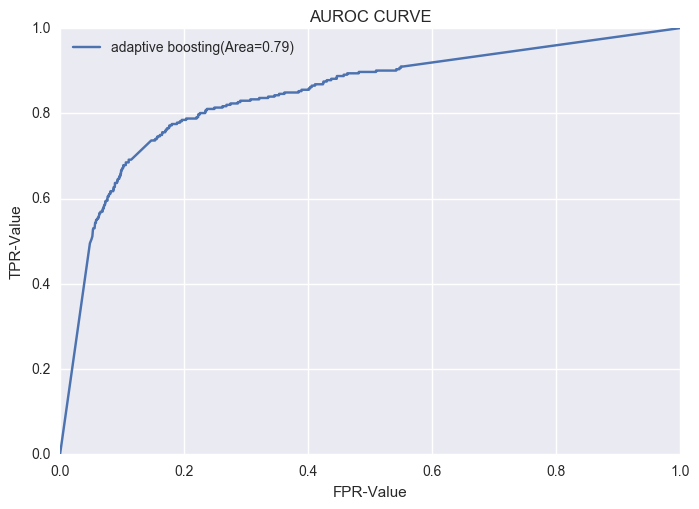

In [109]:

feature_columns = [tf.contrib.layers.real_valued_column("",dimension=1)]

classifier = learn.DNNClassifier(feature_columns=feature_columns,hidden_units=[10,20,20,10],n_classes=2)
# [10,20,20,10] means 10 neurons in input layer, 20 in 1st hidden layer, 20 in second and 10 in output layer.

cr_y_train = cr_y_train.astype(int)   # NN requires inputs in int format

classifier.fit(cr_x1_train,cr_y_train,steps=500,batch_size=32)    

#### Prediction and Model evaluation

pred_value = pd.DataFrame(classifier.predict(cr_x1_test))   # prediction

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = classifier.predict_proba(cr_x1_test)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="adaptive boosting(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()




Composition (10,20,20,10) has the same problem with consistency and low precision with class 1

# Analysis on the Second set
# Sampling
test data is supposed to have data after Jun 15 and the rest will be train data

In [42]:
test=[]
train=[]
for i in range(0,len(issue_d)):
    if issue_d[i] in ["Jun-2015","Jul-2015","Aug-2015","Sep-2015","Oct-2015","Nov-2015","Dec-2015"]:
        test.append(i)
    else :
        train.append(i)

# first set of x variables
cr_x2_test=cr_x2.iloc[test,]
cr_x2_train=cr_x2.iloc[train,]


In [43]:
cr_y_test=cr_y.iloc[test,]
cr_y_train=cr_y.iloc[train,]

column_names=list(cr_x2_train.columns.values)

sm = SMOTE(random_state=42)
cr_x2_train,cr_y_train = sm.fit_sample(cr_x2_train,cr_y_train)
cr_x2_train.shape,cr_y_train.shape

cr_x2_train = pd.DataFrame(cr_x2_train)
cr_x2_train.columns = column_names


Logistic regression

C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix = 
[[256568    112]
 [    63    248]]
TPr =  0.797427652733119
FPr =  0.0004363409693002961
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.69      0.80      0.74       311

    accuracy                           1.00    256991
   macro avg       0.84      0.90      0.87    256991
weighted avg       1.00      1.00      1.00    256991



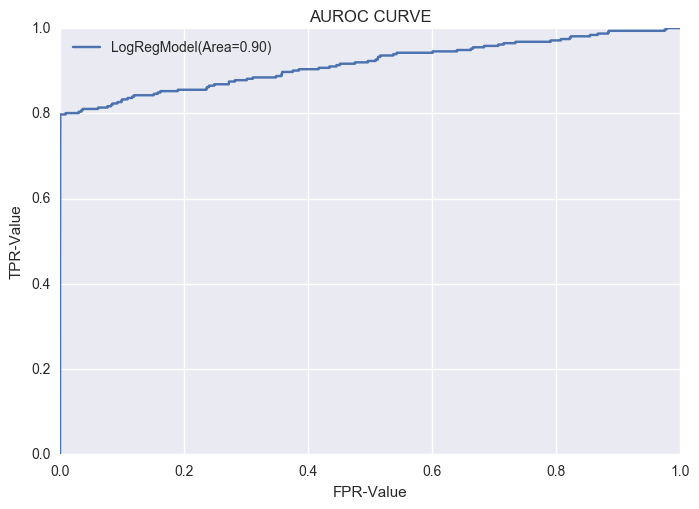

In [44]:

logmodel = LogisticRegression()

logmodel.fit(cr_x2_train,cr_y_train)


#### Prediction and Model evaluation

pred_value = logmodel.predict(cr_x2_test)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = logmodel.predict_proba(cr_x2_test)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="LogRegModel(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()


This model has high accuracy and AUROC, but more importantly the precision in class 1 is 69% which is a huge improvement on 
the previous models. Now we will do feature selection to see if similar results can be reproduced with less number of variables.

C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix = 
[[256565    115]
 [    63    248]]
TPr =  0.797427652733119
FPr =  0.00044802867383512545
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.68      0.80      0.74       311

    accuracy                           1.00    256991
   macro avg       0.84      0.90      0.87    256991
weighted avg       1.00      1.00      1.00    256991



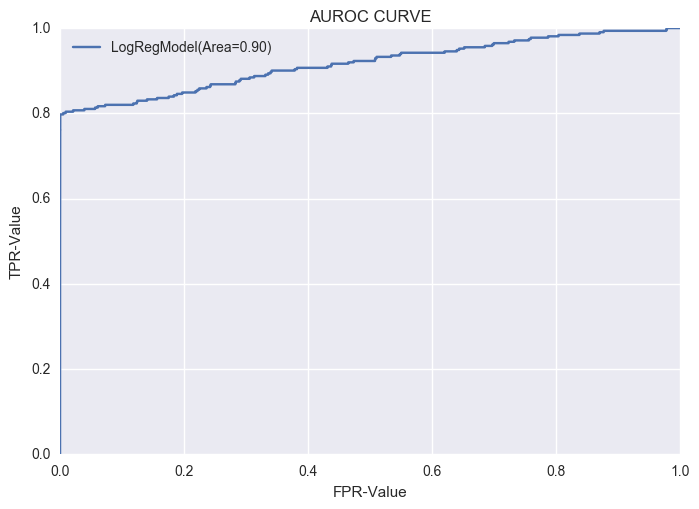

In [117]:
selector = RFE(logmodel, 18, step=1)
selector = selector.fit(cr_x2_train,cr_y_train)
selector.support_ 
xvars=list(cr_x2_train.columns)
sel_vars=[]
for i in range(0,len(selector.support_)) :
    if list(selector.support_)[i]==True :
        sel_vars.append(xvars[i]) 
sel_vars
cr_x2_train_2=cr_x2_train.loc[:,sel_vars]
cr_x2_test_2=cr_x2_test.loc[:,sel_vars]

logmodel1 = LogisticRegression()

logmodel1.fit(cr_x2_train_2,cr_y_train)


#### Prediction and Model evaluation

pred_value = logmodel1.predict(cr_x2_test_2)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = logmodel1.predict_proba(cr_x2_test_2)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="LogRegModel(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()


C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Confusion Matrix = 
[[256555    125]
 [    63    248]]
TPr =  0.797427652733119
FPr =  0.0004869876889512233
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.66      0.80      0.73       311

    accuracy                           1.00    256991
   macro avg       0.83      0.90      0.86    256991
weighted avg       1.00      1.00      1.00    256991



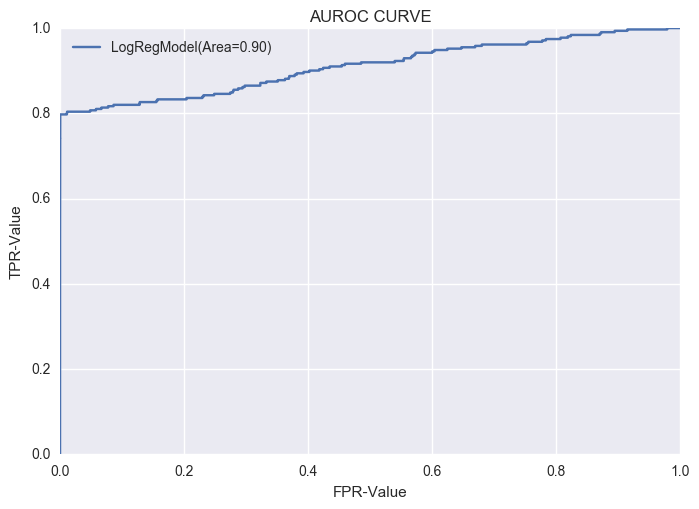

In [118]:
selector = RFE(logmodel, 16, step=1)
selector = selector.fit(cr_x2_train,cr_y_train)
selector.support_ 
xvars=list(cr_x2_train.columns)
sel_vars=[]
for i in range(0,len(selector.support_)) :
    if list(selector.support_)[i]==True :
        sel_vars.append(xvars[i]) 
sel_vars
cr_x2_train_2=cr_x2_train.loc[:,sel_vars]
cr_x2_test_2=cr_x2_test.loc[:,sel_vars]

logmodel1 = LogisticRegression()

logmodel1.fit(cr_x2_train_2,cr_y_train)


#### Prediction and Model evaluation

pred_value = logmodel1.predict(cr_x2_test_2)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = logmodel1.predict_proba(cr_x2_test_2)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="LogRegModel(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()


C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Confusion Matrix = 
[[256565    115]
 [    63    248]]
TPr =  0.797427652733119
FPr =  0.00044802867383512545
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.68      0.80      0.74       311

    accuracy                           1.00    256991
   macro avg       0.84      0.90      0.87    256991
weighted avg       1.00      1.00      1.00    256991



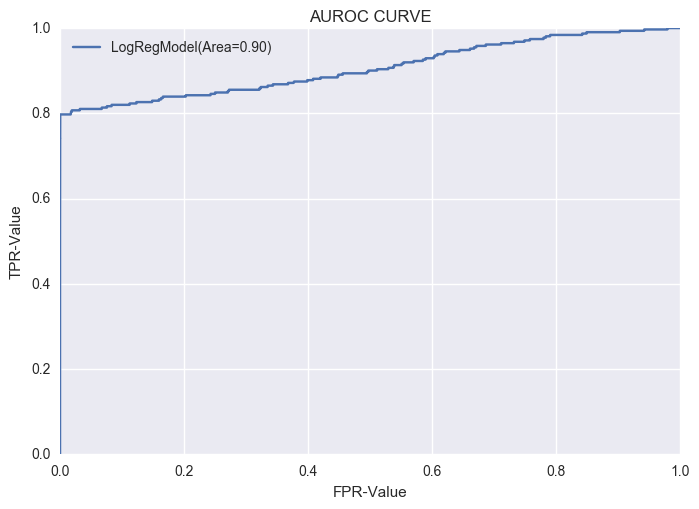

In [133]:
selector = RFE(logmodel, 14, step=1)
selector = selector.fit(cr_x2_train,cr_y_train)
selector.support_ 
xvars=list(cr_x2_train.columns)
sel_vars=[]
for i in range(0,len(selector.support_)) :
    if list(selector.support_)[i]==True :
        sel_vars.append(xvars[i]) 
sel_vars
cr_x2_train_2=cr_x2_train.loc[:,sel_vars]
cr_x2_test_2=cr_x2_test.loc[:,sel_vars]

logmodel1 = LogisticRegression()

logmodel1.fit(cr_x2_train_2,cr_y_train)


#### Prediction and Model evaluation

pred_value = logmodel1.predict(cr_x2_test_2)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = logmodel1.predict_proba(cr_x2_test_2)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="LogRegModel(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()


Hence logistic regression with 14 variables is the best model with high accuracy, AUROC and precision on class 1 is near 70%.
Now even if accuaray is 100% it does not mean overfitting, the reason will be discussed in the interpretation section.

C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Confusion Matrix = 
[[256400    280]
 [    63    248]]
TPr =  0.797427652733119
FPr =  0.0010908524232507402
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.47      0.80      0.59       311

    accuracy                           1.00    256991
   macro avg       0.73      0.90      0.80    256991
weighted avg       1.00      1.00      1.00    256991



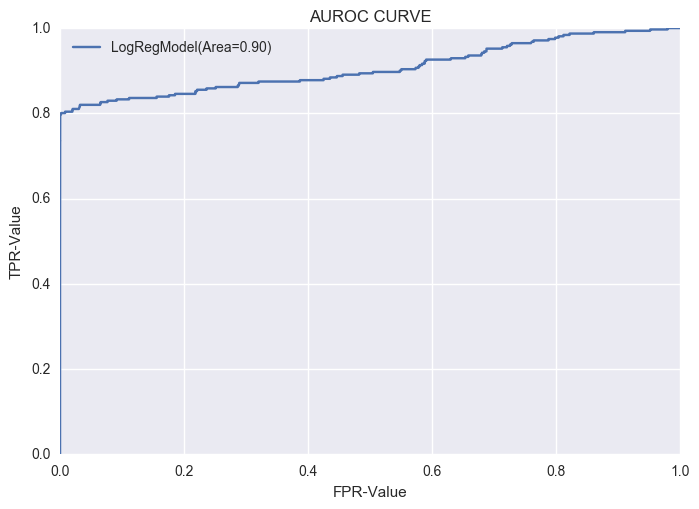

In [120]:
selector = RFE(logmodel, 12, step=1)
selector = selector.fit(cr_x2_train,cr_y_train)
selector.support_ 
xvars=list(cr_x2_train.columns)
sel_vars=[]
for i in range(0,len(selector.support_)) :
    if list(selector.support_)[i]==True :
        sel_vars.append(xvars[i]) 
sel_vars
cr_x2_train_2=cr_x2_train.loc[:,sel_vars]
cr_x2_test_2=cr_x2_test.loc[:,sel_vars]

logmodel1 = LogisticRegression()

logmodel1.fit(cr_x2_train_2,cr_y_train)


#### Prediction and Model evaluation

pred_value = logmodel1.predict(cr_x2_test_2)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = logmodel1.predict_proba(cr_x2_test_2)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="LogRegModel(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()


C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Confusion Matrix = 
[[256492    188]
 [    63    248]]
TPr =  0.797427652733119
FPr =  0.0007324294841826399
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.57      0.80      0.66       311

    accuracy                           1.00    256991
   macro avg       0.78      0.90      0.83    256991
weighted avg       1.00      1.00      1.00    256991



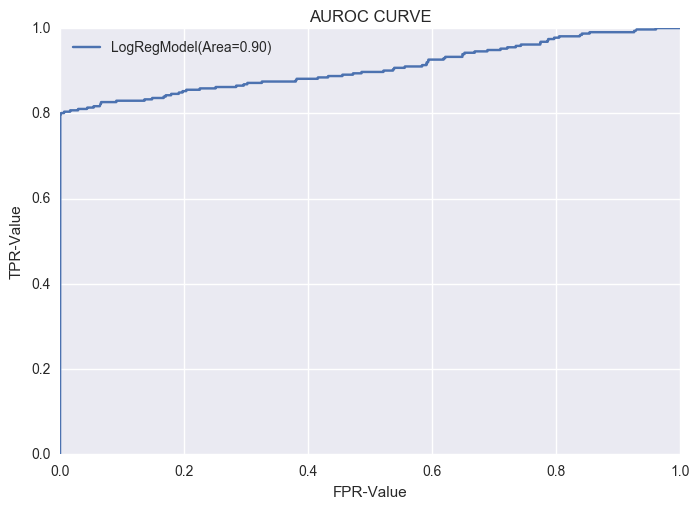

In [121]:
selector = RFE(logmodel, 10, step=1)
selector = selector.fit(cr_x2_train,cr_y_train)
selector.support_ 
xvars=list(cr_x2_train.columns)
sel_vars=[]
for i in range(0,len(selector.support_)) :
    if list(selector.support_)[i]==True :
        sel_vars.append(xvars[i]) 
sel_vars
cr_x2_train_2=cr_x2_train.loc[:,sel_vars]
cr_x2_test_2=cr_x2_test.loc[:,sel_vars]

logmodel1 = LogisticRegression()

logmodel1.fit(cr_x2_train_2,cr_y_train)


#### Prediction and Model evaluation

pred_value = logmodel1.predict(cr_x2_test_2)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = logmodel1.predict_proba(cr_x2_test_2)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="LogRegModel(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()


Although accuracy is high precision has dropped as compared to that for model with 14 features.

C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Confusion Matrix = 
[[ 99119 157561]
 [    18    293]]
TPr =  0.9421221864951769
FPr =  0.6138421380707496
              precision    recall  f1-score   support

           0       1.00      0.39      0.56    256680
           1       0.00      0.94      0.00       311

    accuracy                           0.39    256991
   macro avg       0.50      0.66      0.28    256991
weighted avg       1.00      0.39      0.56    256991



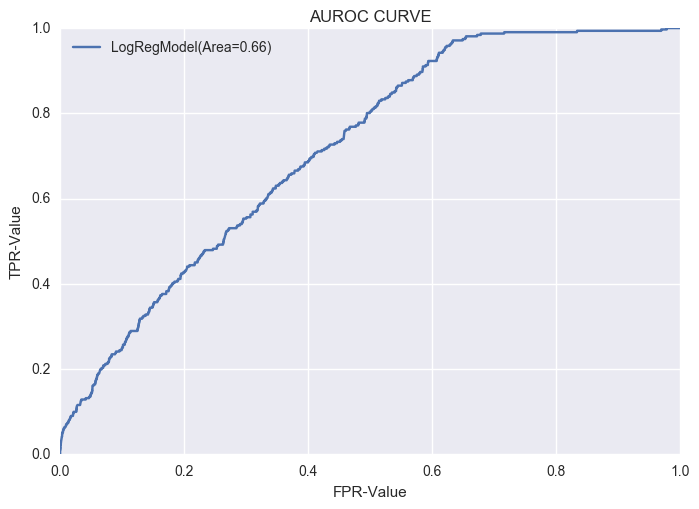

In [122]:
selector = RFE(logmodel, 8, step=1)
selector = selector.fit(cr_x2_train,cr_y_train)
selector.support_ 
xvars=list(cr_x2_train.columns)
sel_vars=[]
for i in range(0,len(selector.support_)) :
    if list(selector.support_)[i]==True :
        sel_vars.append(xvars[i]) 
sel_vars
cr_x2_train_2=cr_x2_train.loc[:,sel_vars]
cr_x2_test_2=cr_x2_test.loc[:,sel_vars]

logmodel1 = LogisticRegression()

logmodel1.fit(cr_x2_train_2,cr_y_train)


#### Prediction and Model evaluation

pred_value = logmodel1.predict(cr_x2_test_2)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = logmodel1.predict_proba(cr_x2_test_2)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="LogRegModel(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()


C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Confusion Matrix = 
[[107761 148919]
 [    38    273]]
TPr =  0.8778135048231511
FPr =  0.5801737572074178
              precision    recall  f1-score   support

           0       1.00      0.42      0.59    256680
           1       0.00      0.88      0.00       311

    accuracy                           0.42    256991
   macro avg       0.50      0.65      0.30    256991
weighted avg       1.00      0.42      0.59    256991



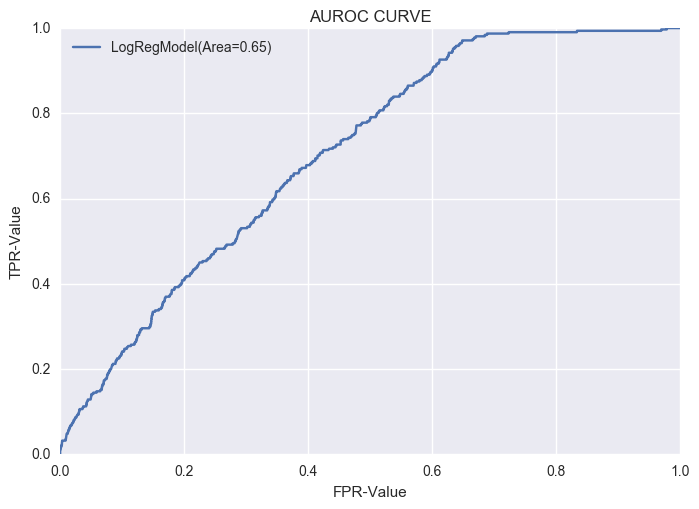

In [123]:
selector = RFE(logmodel, 9, step=1)
selector = selector.fit(cr_x2_train,cr_y_train)
selector.support_ 
xvars=list(cr_x2_train.columns)
sel_vars=[]
for i in range(0,len(selector.support_)) :
    if list(selector.support_)[i]==True :
        sel_vars.append(xvars[i]) 
sel_vars
cr_x2_train_2=cr_x2_train.loc[:,sel_vars]
cr_x2_test_2=cr_x2_test.loc[:,sel_vars]

logmodel1 = LogisticRegression()

logmodel1.fit(cr_x2_train_2,cr_y_train)


#### Prediction and Model evaluation

pred_value = logmodel1.predict(cr_x2_test_2)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = logmodel1.predict_proba(cr_x2_test_2)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="LogRegModel(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()


Decision tree

Confusion Matrix = 
[[ 55382 201298]
 [     3    308]]
TPr =  0.9903536977491961
FPr =  0.7842371824840269
              precision    recall  f1-score   support

           0       1.00      0.22      0.35    256680
           1       0.00      0.99      0.00       311

    accuracy                           0.22    256991
   macro avg       0.50      0.60      0.18    256991
weighted avg       1.00      0.22      0.35    256991



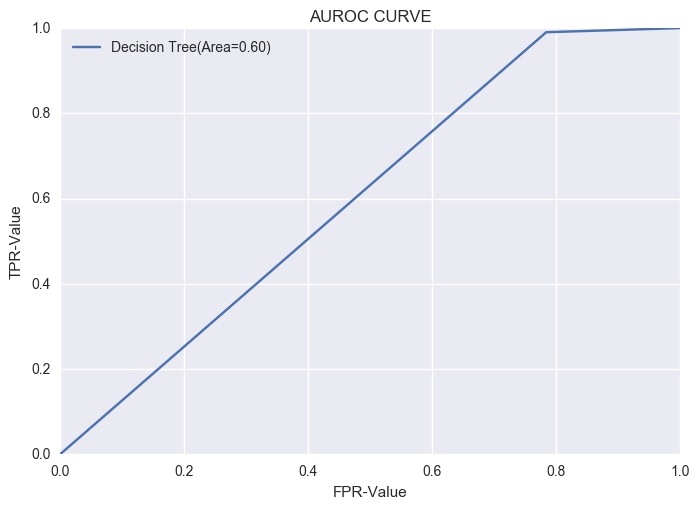

In [58]:

dtree  = DecisionTreeClassifier()

dtree.fit(cr_x2_train,cr_y_train)

pred_value = dtree.predict(cr_x2_test)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = dtree.predict_proba(cr_x2_test)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Decision Tree(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()


Confusion Matrix = 
[[ 52184 204496]
 [     1    310]]
TPr =  0.9967845659163987
FPr =  0.7966962755181549
              precision    recall  f1-score   support

           0       1.00      0.20      0.34    256680
           1       0.00      1.00      0.00       311

    accuracy                           0.20    256991
   macro avg       0.50      0.60      0.17    256991
weighted avg       1.00      0.20      0.34    256991



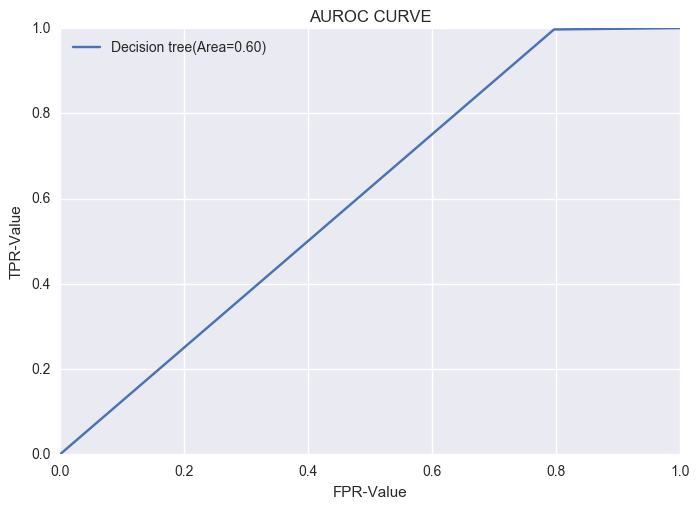

In [59]:

dtree.feature_importances_

top_18 = np.argpartition(dtree.feature_importances_, -18)[-18:]

cr_x2_train_1=cr_x2_train.iloc[:,top_18]

cr_x2_test_1=cr_x2_test.iloc[:,top_18]

dtree1  = DecisionTreeClassifier()

dtree1.fit(cr_x2_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = dtree1.predict(cr_x2_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = dtree1.predict_proba(cr_x2_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Decision tree(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



Confusion Matrix = 
[[ 52524 204156]
 [     2    309]]
TPr =  0.9935691318327974
FPr =  0.7953716690042075
              precision    recall  f1-score   support

           0       1.00      0.20      0.34    256680
           1       0.00      0.99      0.00       311

    accuracy                           0.21    256991
   macro avg       0.50      0.60      0.17    256991
weighted avg       1.00      0.21      0.34    256991



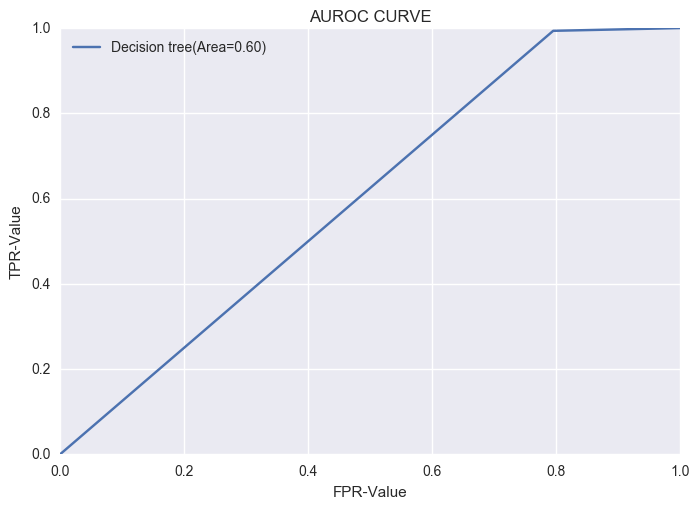

In [60]:

dtree.feature_importances_

top_16 = np.argpartition(dtree.feature_importances_, -16)[-16:]

cr_x2_train_1=cr_x2_train.iloc[:,top_16]

cr_x2_test_1=cr_x2_test.iloc[:,top_16]

dtree1  = DecisionTreeClassifier()

dtree1.fit(cr_x2_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = dtree1.predict(cr_x2_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = dtree1.predict_proba(cr_x2_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Decision tree(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



Confusion Matrix = 
[[ 50693 205987]
 [     2    309]]
TPr =  0.9935691318327974
FPr =  0.8025050646719651
              precision    recall  f1-score   support

           0       1.00      0.20      0.33    256680
           1       0.00      0.99      0.00       311

    accuracy                           0.20    256991
   macro avg       0.50      0.60      0.17    256991
weighted avg       1.00      0.20      0.33    256991



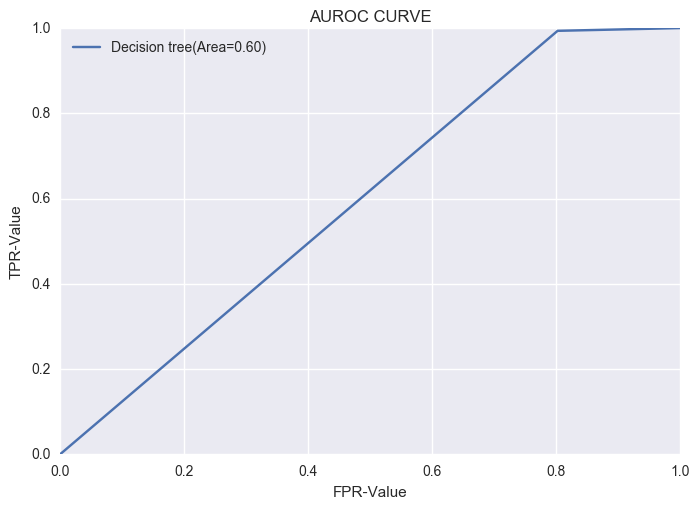

In [61]:

dtree.feature_importances_

top_14 = np.argpartition(dtree.feature_importances_, -14)[-14:]

cr_x2_train_1=cr_x2_train.iloc[:,top_14]

cr_x2_test_1=cr_x2_test.iloc[:,top_14]

dtree1  = DecisionTreeClassifier()

dtree1.fit(cr_x2_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = dtree1.predict(cr_x2_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = dtree1.predict_proba(cr_x2_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Decision tree(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



Confusion Matrix = 
[[ 45687 210993]
 [     2    309]]
TPr =  0.9935691318327974
FPr =  0.8220079476390837
              precision    recall  f1-score   support

           0       1.00      0.18      0.30    256680
           1       0.00      0.99      0.00       311

    accuracy                           0.18    256991
   macro avg       0.50      0.59      0.15    256991
weighted avg       1.00      0.18      0.30    256991



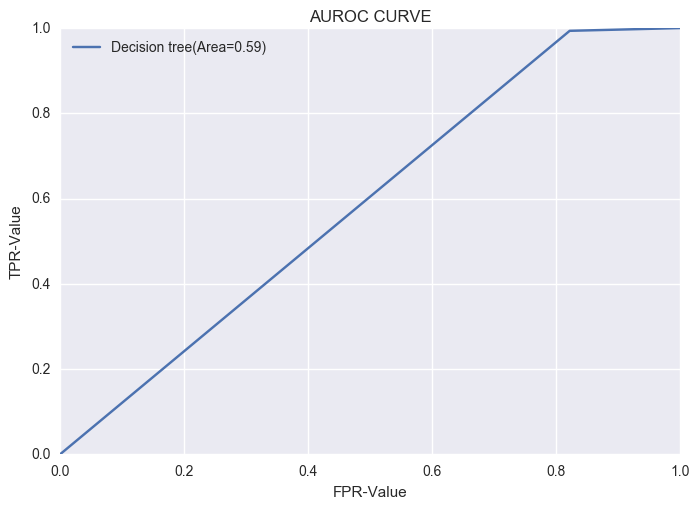

In [62]:

dtree.feature_importances_

top_12 = np.argpartition(dtree.feature_importances_, -12)[-12:]

cr_x2_train_1=cr_x2_train.iloc[:,top_12]

cr_x2_test_1=cr_x2_test.iloc[:,top_12]

dtree1  = DecisionTreeClassifier()

dtree1.fit(cr_x2_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = dtree1.predict(cr_x2_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = dtree1.predict_proba(cr_x2_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Decision tree(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



Confusion Matrix = 
[[ 43484 213196]
 [     2    309]]
TPr =  0.9935691318327974
FPr =  0.8305906186691601
              precision    recall  f1-score   support

           0       1.00      0.17      0.29    256680
           1       0.00      0.99      0.00       311

    accuracy                           0.17    256991
   macro avg       0.50      0.58      0.15    256991
weighted avg       1.00      0.17      0.29    256991



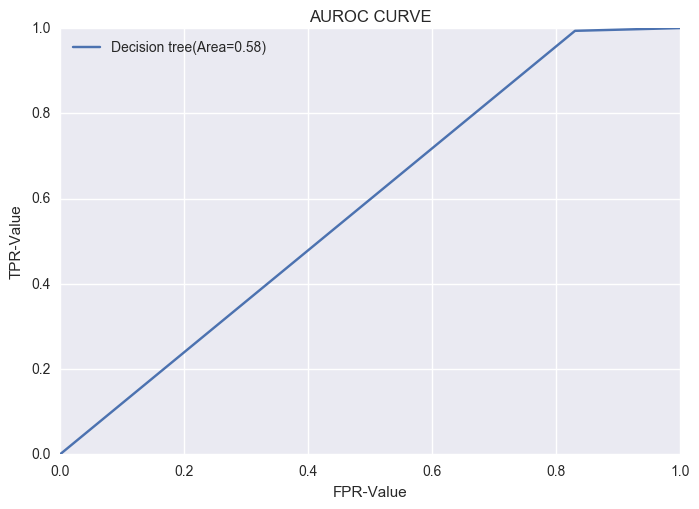

In [63]:

dtree.feature_importances_

top_10 = np.argpartition(dtree.feature_importances_, -10)[-10:]

cr_x2_train_1=cr_x2_train.iloc[:,top_10]

cr_x2_test_1=cr_x2_test.iloc[:,top_10]

dtree1  = DecisionTreeClassifier()

dtree1.fit(cr_x2_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = dtree1.predict(cr_x2_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = dtree1.predict_proba(cr_x2_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Decision tree(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



Random Forest

C:\Users\amey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix = 
[[ 66955 189725]
 [     1    310]]
TPr =  0.9967845659163987
FPr =  0.7391499142901667
              precision    recall  f1-score   support

           0       1.00      0.26      0.41    256680
           1       0.00      1.00      0.00       311

    accuracy                           0.26    256991
   macro avg       0.50      0.63      0.21    256991
weighted avg       1.00      0.26      0.41    256991



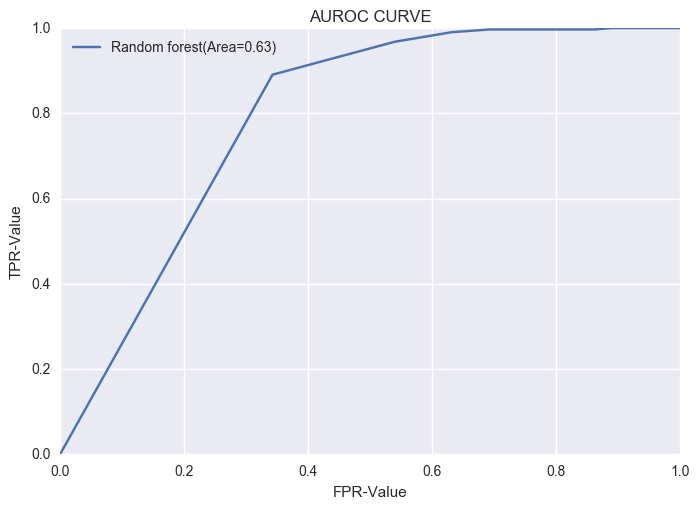

In [66]:

RFC = RandomForestClassifier()

RFC.fit(cr_x2_train,cr_y_train)


#### Prediction and Model evaluation

pred_value = RFC.predict(cr_x2_test)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = RFC.predict_proba(cr_x2_test)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Random forest(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



C:\Users\amey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix = 
[[ 65348 191332]
 [     1    310]]
TPr =  0.9967845659163987
FPr =  0.7454106280193237
              precision    recall  f1-score   support

           0       1.00      0.25      0.41    256680
           1       0.00      1.00      0.00       311

    accuracy                           0.26    256991
   macro avg       0.50      0.63      0.20    256991
weighted avg       1.00      0.26      0.41    256991



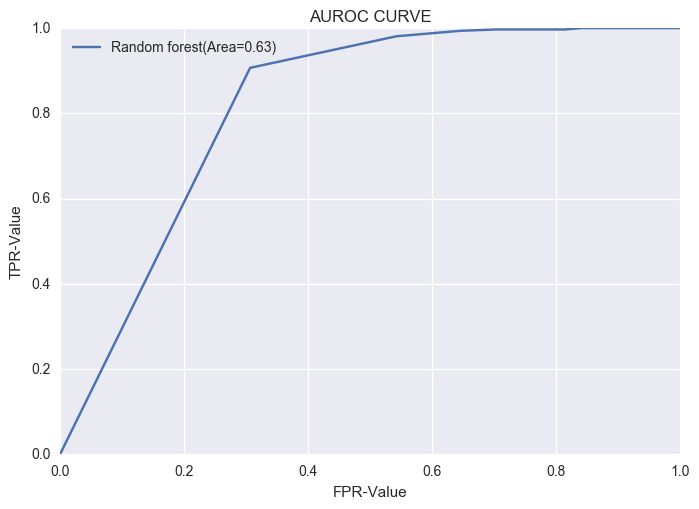

In [67]:

RFC.feature_importances_
top_18 = np.argpartition(RFC.feature_importances_, -18)[-18:]

cr_x2_train_1=cr_x2_train.iloc[:,top_18]
cr_x2_test_1=cr_x2_test.iloc[:,top_18]

RFC1 = RandomForestClassifier()

RFC1.fit(cr_x2_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = RFC1.predict(cr_x2_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = RFC1.predict_proba(cr_x2_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Random forest(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



C:\Users\amey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix = 
[[ 57154 199526]
 [     1    310]]
TPr =  0.9967845659163987
FPr =  0.7773336450054542
              precision    recall  f1-score   support

           0       1.00      0.22      0.36    256680
           1       0.00      1.00      0.00       311

    accuracy                           0.22    256991
   macro avg       0.50      0.61      0.18    256991
weighted avg       1.00      0.22      0.36    256991



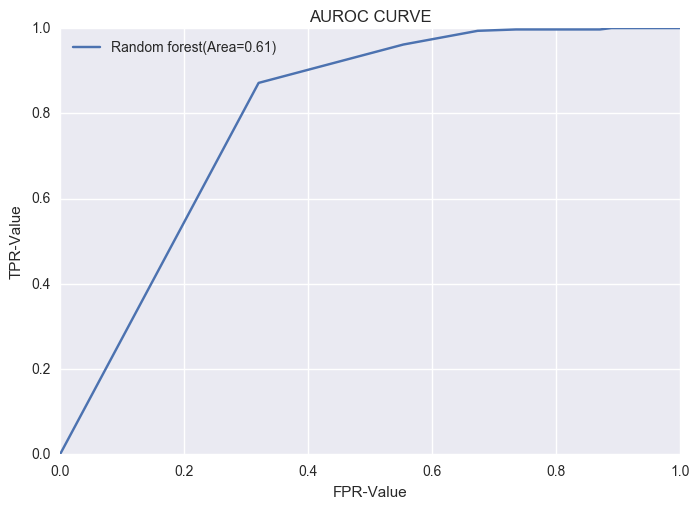

In [68]:

RFC.feature_importances_
top_16 = np.argpartition(RFC.feature_importances_, -16)[-16:]

cr_x2_train_1=cr_x2_train.iloc[:,top_16]
cr_x2_test_1=cr_x2_test.iloc[:,top_16]

RFC1 = RandomForestClassifier()

RFC1.fit(cr_x2_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = RFC1.predict(cr_x2_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = RFC1.predict_proba(cr_x2_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Random forest(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



C:\Users\amey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix = 
[[ 54176 202504]
 [     1    310]]
TPr =  0.9967845659163987
FPr =  0.7889356397070282
              precision    recall  f1-score   support

           0       1.00      0.21      0.35    256680
           1       0.00      1.00      0.00       311

    accuracy                           0.21    256991
   macro avg       0.50      0.60      0.18    256991
weighted avg       1.00      0.21      0.35    256991



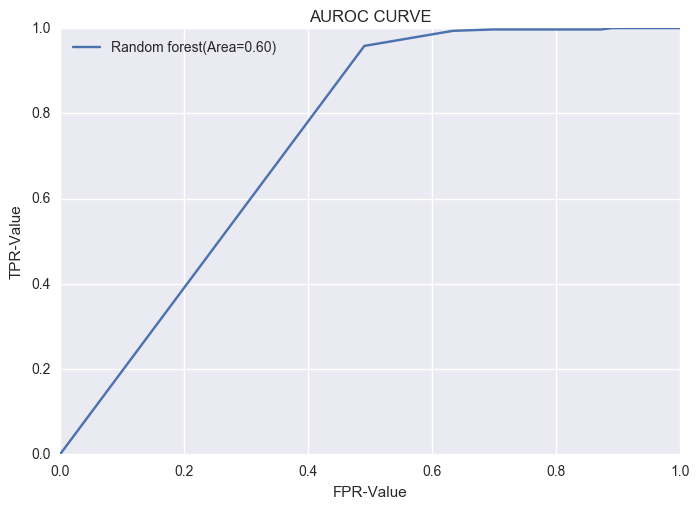

In [69]:

RFC.feature_importances_
top_14 = np.argpartition(RFC.feature_importances_, -14)[-14:]

cr_x2_train_1=cr_x2_train.iloc[:,top_14]
cr_x2_test_1=cr_x2_test.iloc[:,top_14]

RFC1 = RandomForestClassifier()

RFC1.fit(cr_x2_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = RFC1.predict(cr_x2_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = RFC1.predict_proba(cr_x2_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Random forest(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



C:\Users\amey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix = 
[[ 42702 213978]
 [     1    310]]
TPr =  0.9967845659163987
FPr =  0.8336372136512389
              precision    recall  f1-score   support

           0       1.00      0.17      0.29    256680
           1       0.00      1.00      0.00       311

    accuracy                           0.17    256991
   macro avg       0.50      0.58      0.14    256991
weighted avg       1.00      0.17      0.28    256991



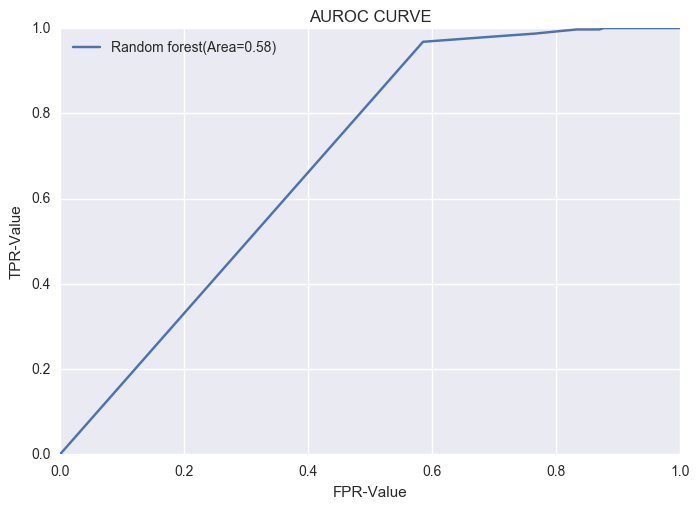

In [70]:

RFC.feature_importances_
top_12 = np.argpartition(RFC.feature_importances_, -12)[-12:]

cr_x2_train_1=cr_x2_train.iloc[:,top_12]
cr_x2_test_1=cr_x2_test.iloc[:,top_12]

RFC1 = RandomForestClassifier()

RFC1.fit(cr_x2_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = RFC1.predict(cr_x2_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = RFC1.predict_proba(cr_x2_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Random forest(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



C:\Users\amey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix = 
[[ 40339 216341]
 [     1    310]]
TPr =  0.9967845659163987
FPr =  0.8428432289231729
              precision    recall  f1-score   support

           0       1.00      0.16      0.27    256680
           1       0.00      1.00      0.00       311

    accuracy                           0.16    256991
   macro avg       0.50      0.58      0.14    256991
weighted avg       1.00      0.16      0.27    256991



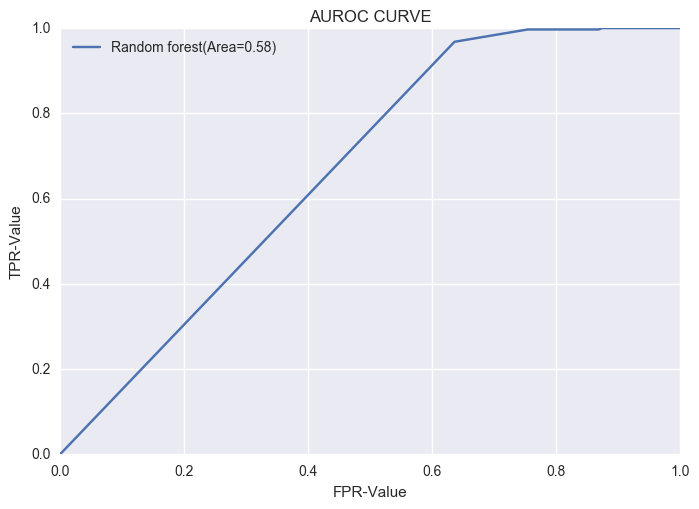

In [71]:

RFC.feature_importances_
top_10 = np.argpartition(RFC.feature_importances_, -10)[-10:]

cr_x2_train_1=cr_x2_train.iloc[:,top_10]
cr_x2_test_1=cr_x2_test.iloc[:,top_10]

RFC1 = RandomForestClassifier()

RFC1.fit(cr_x2_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = RFC1.predict(cr_x2_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = RFC1.predict_proba(cr_x2_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Random forest(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



Naive Bias

Confusion Matrix = 
[[232429  24251]
 [    98    213]]
TPr =  0.684887459807074
FPr =  0.09447950755804893
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    256680
           1       0.01      0.68      0.02       311

    accuracy                           0.91    256991
   macro avg       0.50      0.80      0.48    256991
weighted avg       1.00      0.91      0.95    256991



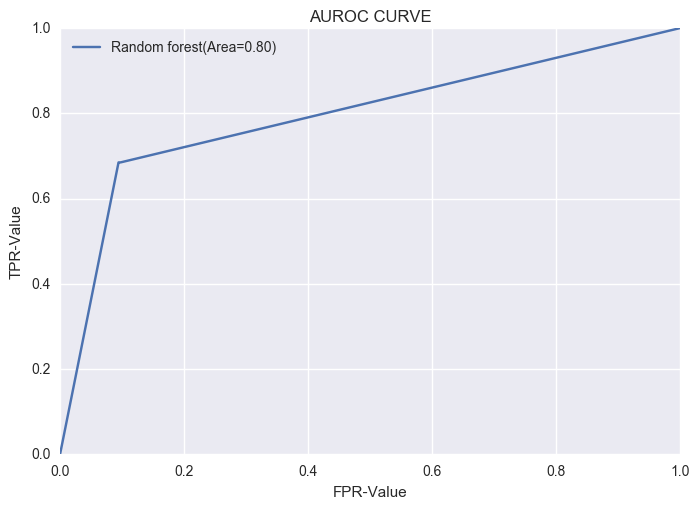

In [105]:

NB = MultinomialNB()

NB.fit(cr_x2_train,cr_y_train)

pred_value = NB.predict(cr_x2_test)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = NB.predict_proba(cr_x2_test)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Random forest(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(cr_x2_train,cr_y_train)


#### Prediction and Model evaluation

pred_value = knn.predict(cr_x2_test)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = knn.predict_proba(cr_x2_test)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="KNeighborsClassifier(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



adaptive boosting

Confusion Matrix = 
[[ 53628 203052]
 [     2    309]]
TPr =  0.9935691318327974
FPr =  0.7910705937353903
              precision    recall  f1-score   support

           0       1.00      0.21      0.35    256680
           1       0.00      0.99      0.00       311

    accuracy                           0.21    256991
   macro avg       0.50      0.60      0.17    256991
weighted avg       1.00      0.21      0.35    256991



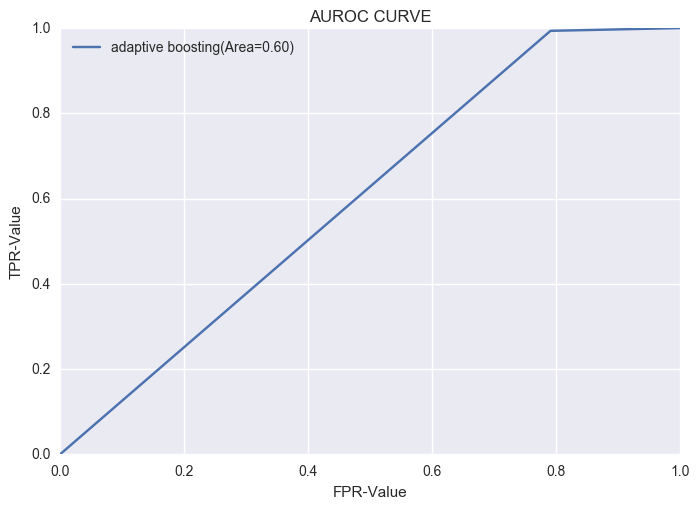

In [46]:

abc = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 15) 

abc.fit(cr_x2_train,cr_y_train)


#### Prediction and Model evaluation

pred_value = abc.predict(cr_x2_test)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = abc.predict_proba(cr_x2_test)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="adaptive boosting(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



Voting classifier

In [47]:

# voting hard
logmodel = LogisticRegression()
dtree = DecisionTreeClassifier()
rfc = RandomForestClassifier()

vc = VotingClassifier(estimators = [("logmodel",logmodel),("dtree",dtree),("rfc",rfc)],voting='hard')

vc.fit(cr_x2_train,cr_y_train)


#### Prediction and Model evaluation

pred_value = vc.predict(cr_x2_test)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve



C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix = 
[[ 71733 184947]
 [     2    309]]
TPr =  0.9935691318327974
FPr =  0.7205352968676951
              precision    recall  f1-score   support

           0       1.00      0.28      0.44    256680
           1       0.00      0.99      0.00       311

    accuracy                           0.28    256991
   macro avg       0.50      0.64      0.22    256991
weighted avg       1.00      0.28      0.44    256991



0.6365169174825511

In [48]:
# voting soft

logmodel = LogisticRegression()
dtree = DecisionTreeClassifier()
rfc = RandomForestClassifier()

vc = VotingClassifier(estimators = [("logmodel",logmodel),("dtree",dtree),("rfc",rfc)],voting='soft')

vc.fit(cr_x2_train,cr_y_train)


#### Prediction and Model evaluation

pred_value = vc.predict(cr_x2_test)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))



C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix = 
[[ 68443 188237]
 [     2    309]]
TPr =  0.9935691318327974
FPr =  0.7333528128408914
              precision    recall  f1-score   support

           0       1.00      0.27      0.42    256680
           1       0.00      0.99      0.00       311

    accuracy                           0.27    256991
   macro avg       0.50      0.63      0.21    256991
weighted avg       1.00      0.27      0.42    256991



Neural networks

W0930 15:53:42.390512  4920 estimator.py:453] Using temporary folder as model directory: C:\Users\amey\AppData\Local\Temp\tmpwwhoyiok
W0930 15:53:48.102041  4920 data_feeder.py:283] float64 is not supported by many models, consider casting to float32.
W0930 15:53:48.861550  4920 head.py:2027] Casting <dtype: 'int32'> labels to bool.
W0930 15:53:49.066686  4920 head.py:2027] Casting <dtype: 'int32'> labels to bool.
W0930 15:53:49.198774  4920 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0930 15:53:49.233798  4920 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0930 15:53:53.684102  4920 data_feeder.py:283] float64 is not supported by many models, consider casting to float32.


Confusion Matrix = 
[[234411  22269]
 [   164    147]]
TPr =  0.47266881028938906
FPr =  0.08675783076203833


W0930 15:53:56.007652  4920 data_feeder.py:283] float64 is not supported by many models, consider casting to float32.


              precision    recall  f1-score   support

           0       1.00      0.91      0.95    256680
           1       0.01      0.47      0.01       311

    accuracy                           0.91    256991
   macro avg       0.50      0.69      0.48    256991
weighted avg       1.00      0.91      0.95    256991



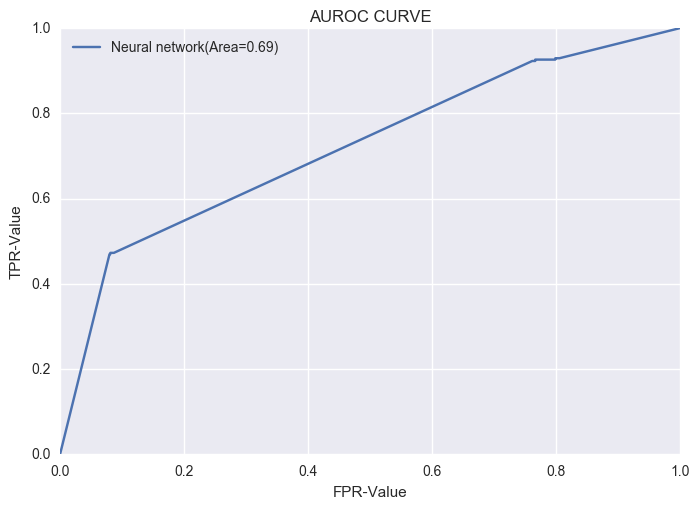

In [110]:

feature_columns = [tf.contrib.layers.real_valued_column("",dimension=1)]

classifier = learn.DNNClassifier(feature_columns=feature_columns,hidden_units=[10,20,10],n_classes=2)

cr_y_train = cr_y_train.astype(int)   # NN requires inputs in int format

classifier.fit(cr_x2_train,cr_y_train,steps=500,batch_size=32)    

#### Prediction and Model evaluation

pred_value = pd.DataFrame(classifier.predict(cr_x2_test))   # prediction

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = classifier.predict_proba(cr_x2_test)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Neural network(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()




W0930 15:54:40.517437  4920 estimator.py:453] Using temporary folder as model directory: C:\Users\amey\AppData\Local\Temp\tmpzjdy60dg
W0930 15:54:40.629513  4920 data_feeder.py:283] float64 is not supported by many models, consider casting to float32.
W0930 15:54:41.444056  4920 head.py:2027] Casting <dtype: 'int32'> labels to bool.
W0930 15:54:41.612169  4920 head.py:2027] Casting <dtype: 'int32'> labels to bool.
W0930 15:54:41.728246  4920 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0930 15:54:41.769274  4920 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0930 15:54:45.347780  4920 data_feeder.py:283] float64 is not supported by many models, consider casting to float32.


Confusion Matrix = 
[[216648  40032]
 [   119    192]]
TPr =  0.617363344051447
FPr =  0.15596072931276297


W0930 15:54:47.584273  4920 data_feeder.py:283] float64 is not supported by many models, consider casting to float32.


              precision    recall  f1-score   support

           0       1.00      0.84      0.92    256680
           1       0.00      0.62      0.01       311

    accuracy                           0.84    256991
   macro avg       0.50      0.73      0.46    256991
weighted avg       1.00      0.84      0.91    256991



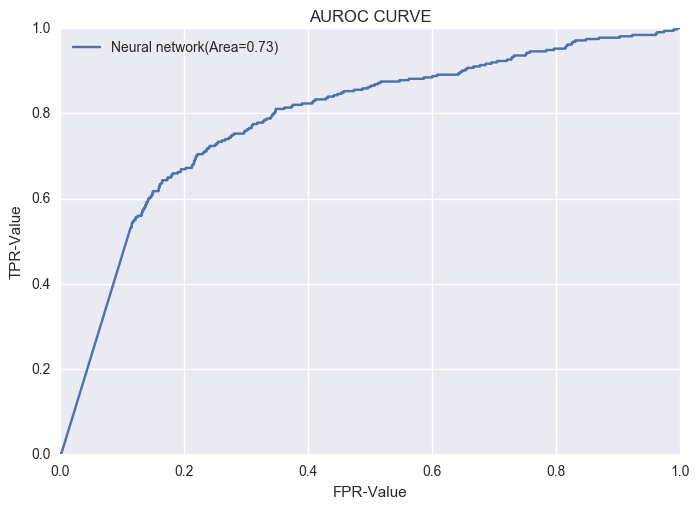

In [112]:

feature_columns = [tf.contrib.layers.real_valued_column("",dimension=1)]

classifier = learn.DNNClassifier(feature_columns=feature_columns,hidden_units=[10,20,20,10],n_classes=2)

cr_y_train = cr_y_train.astype(int)   # NN requires inputs in int format

classifier.fit(cr_x1_train,cr_y_train,steps=500,batch_size=32)    

#### Prediction and Model evaluation

pred_value = pd.DataFrame(classifier.predict(cr_x1_test))   # prediction

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = classifier.predict_proba(cr_x1_test)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Neural network(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()




# Analysis on the third set
# Sampling
test data is supposed to have data after Jun 15 and the rest will be train data

In [72]:
test=[]
train=[]
for i in range(0,len(issue_d)):
    if issue_d[i] in ["Jun-2015","Jul-2015","Aug-2015","Sep-2015","Oct-2015","Nov-2015","Dec-2015"]:
        test.append(i)
    else :
        train.append(i)

# first set of x variables
cr_x3_test=cr_x3.iloc[test,]
cr_x3_train=cr_x3.iloc[train,]

In [73]:
cr_y_test=cr_y.iloc[test,]
cr_y_train=cr_y.iloc[train,]

column_names=list(cr_x3_train.columns.values)

In [74]:
sm = SMOTE(random_state=42)
cr_x3_train,cr_y_train = sm.fit_sample(cr_x3_train,cr_y_train)
cr_x3_train.shape,cr_y_train.shape

cr_x3_train = pd.DataFrame(cr_x3_train)
cr_x3_train.columns = column_names

Logistic regression

C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix = 
[[256568    112]
 [    63    248]]
TPr =  0.797427652733119
FPr =  0.0004363409693002961
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.69      0.80      0.74       311

    accuracy                           1.00    256991
   macro avg       0.84      0.90      0.87    256991
weighted avg       1.00      1.00      1.00    256991



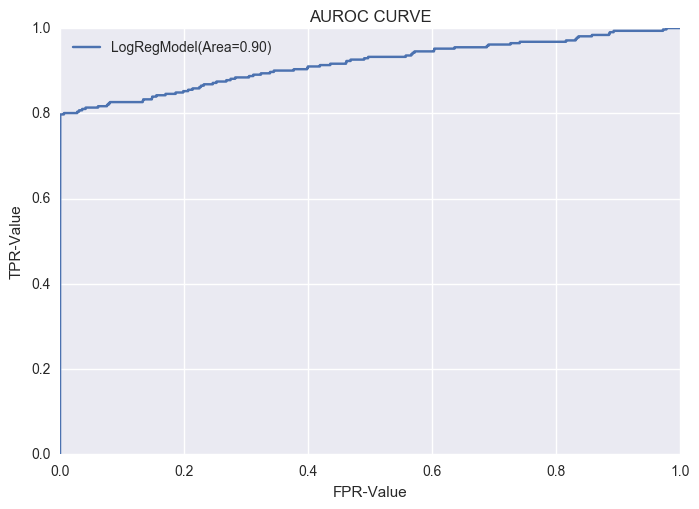

In [52]:
logmodel = LogisticRegression()

logmodel.fit(cr_x3_train,cr_y_train)


#### Prediction and Model evaluation

pred_value = logmodel.predict(cr_x3_test)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = logmodel.predict_proba(cr_x3_test)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="LogRegModel(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()

C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Confusion Matrix = 
[[256427    253]
 [    63    248]]
TPr =  0.797427652733119
FPr =  0.000985663082437276
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.50      0.80      0.61       311

    accuracy                           1.00    256991
   macro avg       0.75      0.90      0.81    256991
weighted avg       1.00      1.00      1.00    256991



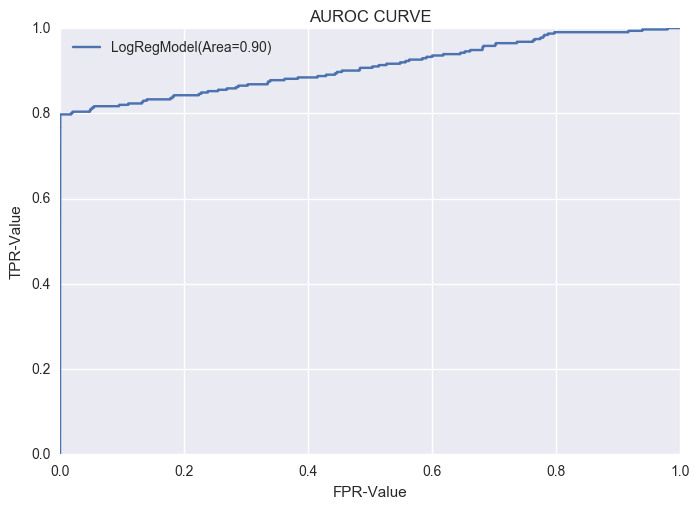

In [51]:
selector = RFE(logmodel, 35, step=1)
selector = selector.fit(cr_x3_train,cr_y_train)
selector.support_ 
xvars=list(cr_x3_train.columns)
sel_vars=[]
for i in range(0,len(selector.support_)) :
    if list(selector.support_)[i]==True :
        sel_vars.append(xvars[i]) 
sel_vars
cr_x3_train_1=cr_x3_train.loc[:,sel_vars]
cr_x3_test_1=cr_x3_test.loc[:,sel_vars]

logmodel1 = LogisticRegression()

logmodel1.fit(cr_x3_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = logmodel1.predict(cr_x3_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = logmodel1.predict_proba(cr_x3_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="LogRegModel(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()


C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Confusion Matrix = 
[[255944    736]
 [    63    248]]
TPr =  0.797427652733119
FPr =  0.002867383512544803
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.25      0.80      0.38       311

    accuracy                           1.00    256991
   macro avg       0.63      0.90      0.69    256991
weighted avg       1.00      1.00      1.00    256991



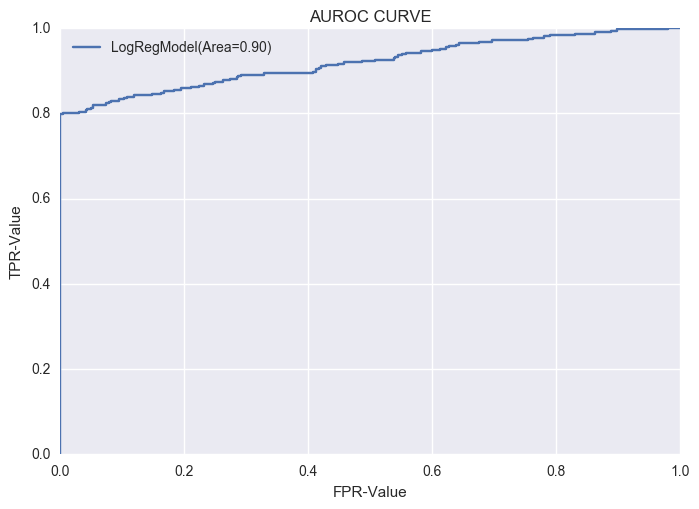

In [52]:
selector = RFE(logmodel, 30, step=1)
selector = selector.fit(cr_x3_train,cr_y_train)
selector.support_ 
xvars=list(cr_x3_train.columns)
sel_vars=[]
for i in range(0,len(selector.support_)) :
    if list(selector.support_)[i]==True :
        sel_vars.append(xvars[i]) 
sel_vars
cr_x3_train_1=cr_x3_train.loc[:,sel_vars]
cr_x3_test_1=cr_x3_test.loc[:,sel_vars]

logmodel1 = LogisticRegression()

logmodel1.fit(cr_x3_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = logmodel1.predict(cr_x3_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = logmodel1.predict_proba(cr_x3_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="LogRegModel(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()


C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Confusion Matrix = 
[[256547    133]
 [    63    248]]
TPr =  0.797427652733119
FPr =  0.0005181549010441016
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.65      0.80      0.72       311

    accuracy                           1.00    256991
   macro avg       0.83      0.90      0.86    256991
weighted avg       1.00      1.00      1.00    256991



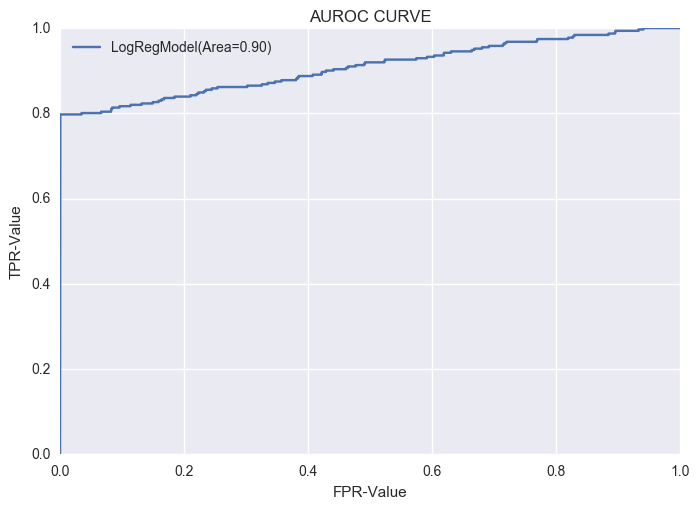

In [53]:
selector = RFE(logmodel, 20, step=1)
selector = selector.fit(cr_x3_train,cr_y_train)
selector.support_ 
xvars=list(cr_x3_train.columns)
sel_vars=[]
for i in range(0,len(selector.support_)) :
    if list(selector.support_)[i]==True :
        sel_vars.append(xvars[i]) 
sel_vars
cr_x3_train_1=cr_x3_train.loc[:,sel_vars]
cr_x3_test_1=cr_x3_test.loc[:,sel_vars]

logmodel1 = LogisticRegression()

logmodel1.fit(cr_x3_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = logmodel1.predict(cr_x3_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = logmodel1.predict_proba(cr_x3_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="LogRegModel(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()


C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Confusion Matrix = 
[[123108 133572]
 [   104    207]]
TPr =  0.6655948553054662
FPr =  0.5203833567087424
              precision    recall  f1-score   support

           0       1.00      0.48      0.65    256680
           1       0.00      0.67      0.00       311

    accuracy                           0.48    256991
   macro avg       0.50      0.57      0.33    256991
weighted avg       1.00      0.48      0.65    256991



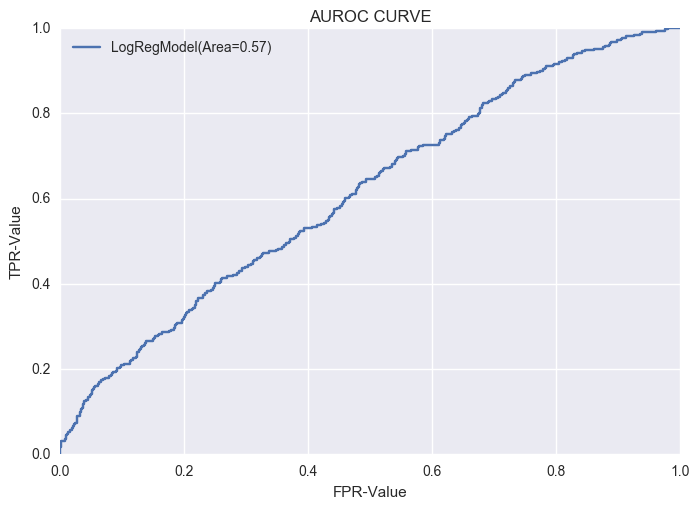

In [54]:
selector = RFE(logmodel, 15, step=1)
selector = selector.fit(cr_x3_train,cr_y_train)
selector.support_ 
xvars=list(cr_x3_train.columns)
sel_vars=[]
for i in range(0,len(selector.support_)) :
    if list(selector.support_)[i]==True :
        sel_vars.append(xvars[i]) 
sel_vars
cr_x3_train_1=cr_x3_train.loc[:,sel_vars]
cr_x3_test_1=cr_x3_test.loc[:,sel_vars]

logmodel1 = LogisticRegression()

logmodel1.fit(cr_x3_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = logmodel1.predict(cr_x3_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = logmodel1.predict_proba(cr_x3_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="LogRegModel(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()


Decision tree

Confusion Matrix = 
[[123456 133224]
 [    11    300]]
TPr =  0.9646302250803859
FPr =  0.5190275829827022
              precision    recall  f1-score   support

           0       1.00      0.48      0.65    256680
           1       0.00      0.96      0.00       311

    accuracy                           0.48    256991
   macro avg       0.50      0.72      0.33    256991
weighted avg       1.00      0.48      0.65    256991



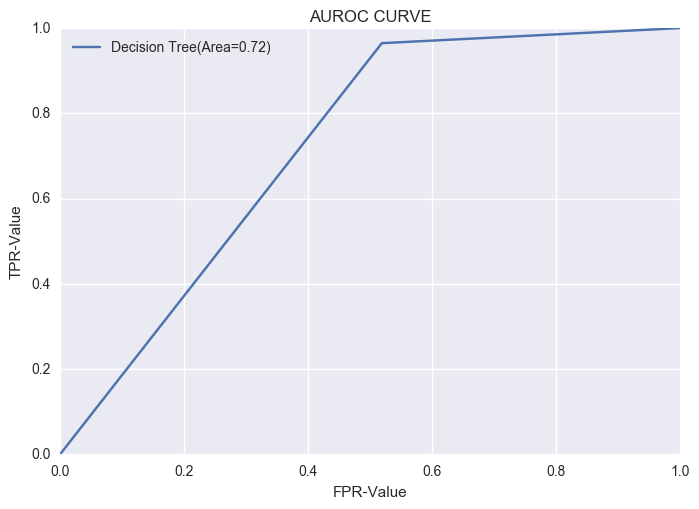

In [75]:

dtree  = DecisionTreeClassifier()

dtree.fit(cr_x3_train,cr_y_train)

pred_value = dtree.predict(cr_x3_test)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = dtree.predict_proba(cr_x3_test)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Decision Tree(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



Confusion Matrix = 
[[124368 132312]
 [    11    300]]
TPr =  0.9646302250803859
FPr =  0.515474520804114
              precision    recall  f1-score   support

           0       1.00      0.48      0.65    256680
           1       0.00      0.96      0.00       311

    accuracy                           0.49    256991
   macro avg       0.50      0.72      0.33    256991
weighted avg       1.00      0.49      0.65    256991



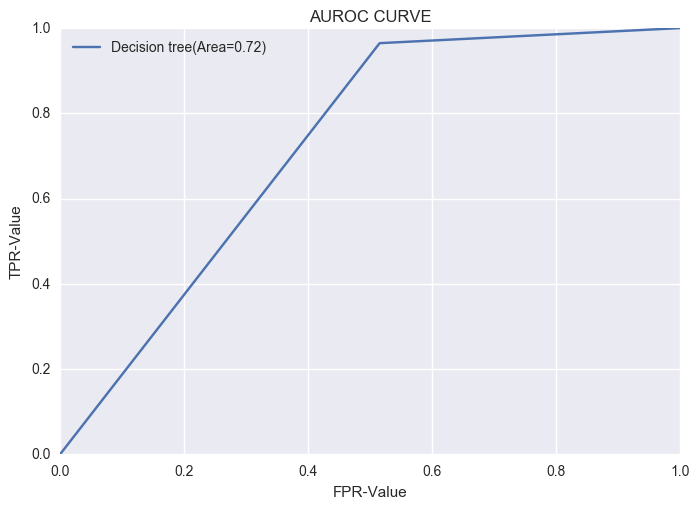

In [81]:

dtree.feature_importances_

top_35 = np.argpartition(dtree.feature_importances_, -35)[-35:]

cr_x3_train_1=cr_x3_train.iloc[:,top_35]

cr_x3_test_1=cr_x3_test.iloc[:,top_35]

dtree1  = DecisionTreeClassifier()

dtree1.fit(cr_x3_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = dtree1.predict(cr_x3_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = dtree1.predict_proba(cr_x3_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Decision tree(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



Confusion Matrix = 
[[110679 146001]
 [     9    302]]
TPr =  0.9710610932475884
FPr =  0.5688055165965404
              precision    recall  f1-score   support

           0       1.00      0.43      0.60    256680
           1       0.00      0.97      0.00       311

    accuracy                           0.43    256991
   macro avg       0.50      0.70      0.30    256991
weighted avg       1.00      0.43      0.60    256991



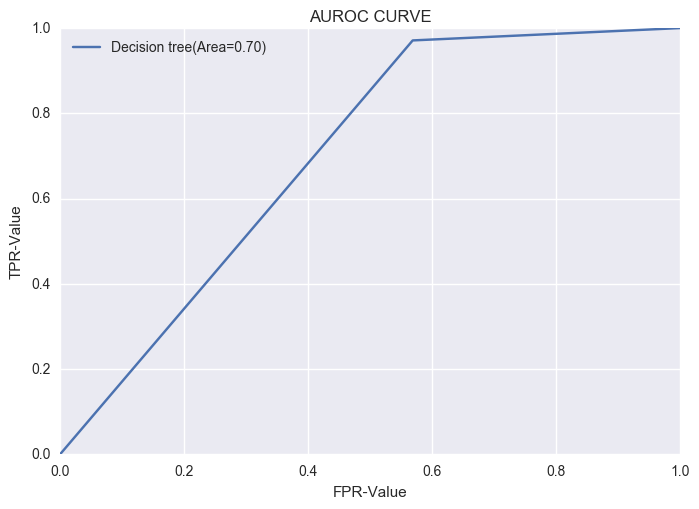

In [82]:

dtree.feature_importances_

top_30 = np.argpartition(dtree.feature_importances_, -30)[-30:]

cr_x3_train_1=cr_x3_train.iloc[:,top_30]

cr_x3_test_1=cr_x3_test.iloc[:,top_30]

dtree1  = DecisionTreeClassifier()

dtree1.fit(cr_x3_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = dtree1.predict(cr_x3_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = dtree1.predict_proba(cr_x3_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Decision tree(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



Confusion Matrix = 
[[101273 155407]
 [     5    306]]
TPr =  0.9839228295819936
FPr =  0.6054503662147421
              precision    recall  f1-score   support

           0       1.00      0.39      0.57    256680
           1       0.00      0.98      0.00       311

    accuracy                           0.40    256991
   macro avg       0.50      0.69      0.28    256991
weighted avg       1.00      0.40      0.57    256991



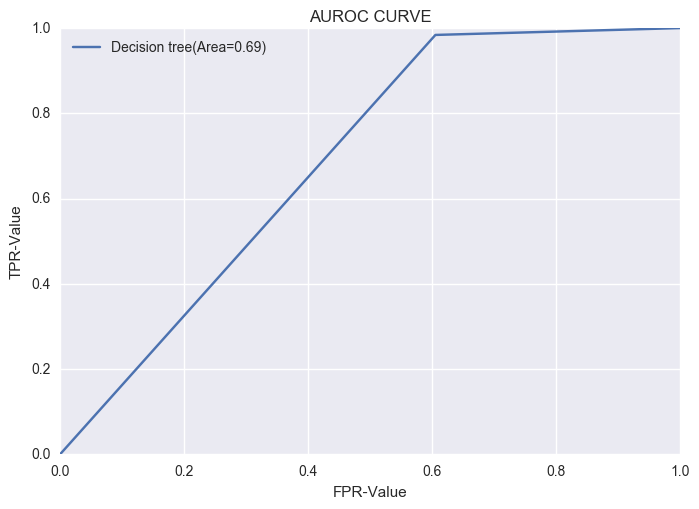

In [77]:

dtree.feature_importances_

top_25 = np.argpartition(dtree.feature_importances_, -25)[-25:]

cr_x3_train_1=cr_x3_train.iloc[:,top_25]

cr_x3_test_1=cr_x3_test.iloc[:,top_25]

dtree1  = DecisionTreeClassifier()

dtree1.fit(cr_x3_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = dtree1.predict(cr_x3_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = dtree1.predict_proba(cr_x3_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Decision tree(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



Confusion Matrix = 
[[ 90952 165728]
 [     5    306]]
TPr =  0.9839228295819936
FPr =  0.6456599657160667
              precision    recall  f1-score   support

           0       1.00      0.35      0.52    256680
           1       0.00      0.98      0.00       311

    accuracy                           0.36    256991
   macro avg       0.50      0.67      0.26    256991
weighted avg       1.00      0.36      0.52    256991



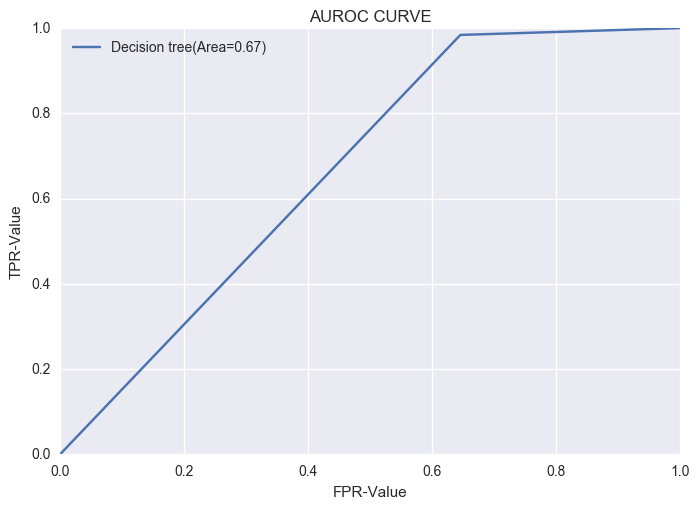

In [78]:

dtree.feature_importances_

top_20 = np.argpartition(dtree.feature_importances_, -20)[-20:]

cr_x3_train_1=cr_x3_train.iloc[:,top_20]

cr_x3_test_1=cr_x3_test.iloc[:,top_20]

dtree1  = DecisionTreeClassifier()

dtree1.fit(cr_x3_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = dtree1.predict(cr_x3_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = dtree1.predict_proba(cr_x3_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Decision tree(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



Confusion Matrix = 
[[ 74002 182678]
 [     2    309]]
TPr =  0.9935691318327974
FPr =  0.7116954963378526
              precision    recall  f1-score   support

           0       1.00      0.29      0.45    256680
           1       0.00      0.99      0.00       311

    accuracy                           0.29    256991
   macro avg       0.50      0.64      0.23    256991
weighted avg       1.00      0.29      0.45    256991



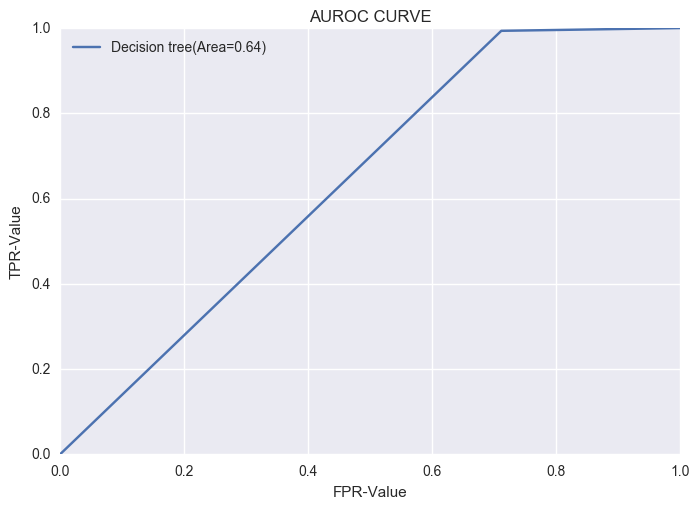

In [79]:

dtree.feature_importances_

top_15 = np.argpartition(dtree.feature_importances_, -15)[-15:]

cr_x3_train_1=cr_x3_train.iloc[:,top_15]

cr_x3_test_1=cr_x3_test.iloc[:,top_15]

dtree1  = DecisionTreeClassifier()

dtree1.fit(cr_x3_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = dtree1.predict(cr_x3_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = dtree1.predict_proba(cr_x3_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Decision tree(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



Confusion Matrix = 
[[ 89320 167360]
 [     4    307]]
TPr =  0.9871382636655949
FPr =  0.6520180769830138
              precision    recall  f1-score   support

           0       1.00      0.35      0.52    256680
           1       0.00      0.99      0.00       311

    accuracy                           0.35    256991
   macro avg       0.50      0.67      0.26    256991
weighted avg       1.00      0.35      0.52    256991



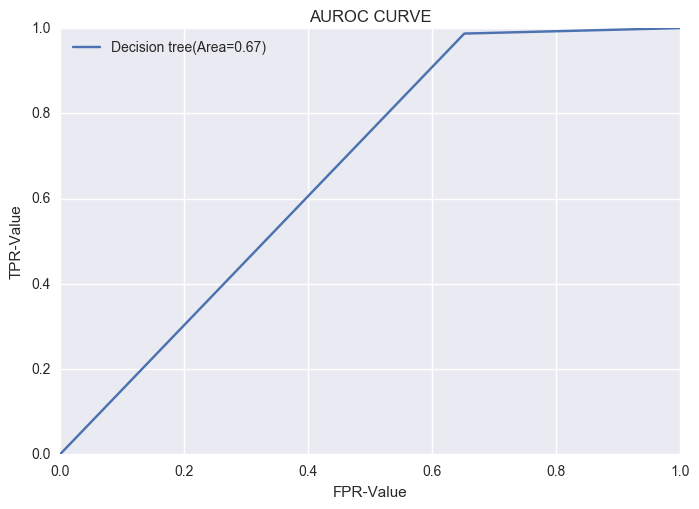

In [80]:

dtree.feature_importances_

top_10 = np.argpartition(dtree.feature_importances_, -10)[-10:]

cr_x3_train_1=cr_x3_train.iloc[:,top_10]

cr_x3_test_1=cr_x3_test.iloc[:,top_10]

dtree1  = DecisionTreeClassifier()

dtree1.fit(cr_x3_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = dtree1.predict(cr_x3_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = dtree1.predict_proba(cr_x3_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Decision tree(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



Random Forest

C:\Users\amey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix = 
[[146621 110059]
 [    11    300]]
TPr =  0.9646302250803859
FPr =  0.4287790244662615
              precision    recall  f1-score   support

           0       1.00      0.57      0.73    256680
           1       0.00      0.96      0.01       311

    accuracy                           0.57    256991
   macro avg       0.50      0.77      0.37    256991
weighted avg       1.00      0.57      0.73    256991



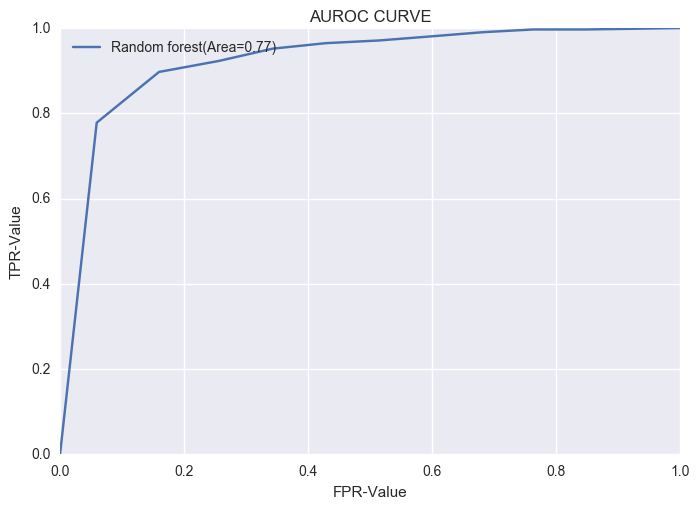

In [83]:

RFC = RandomForestClassifier()

RFC.fit(cr_x3_train,cr_y_train)


#### Prediction and Model evaluation

pred_value = RFC.predict(cr_x3_test)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = RFC.predict_proba(cr_x3_test)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Random forest(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



C:\Users\amey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix = 
[[131583 125097]
 [    11    300]]
TPr =  0.9646302250803859
FPr =  0.48736559139784946
              precision    recall  f1-score   support

           0       1.00      0.51      0.68    256680
           1       0.00      0.96      0.00       311

    accuracy                           0.51    256991
   macro avg       0.50      0.74      0.34    256991
weighted avg       1.00      0.51      0.68    256991



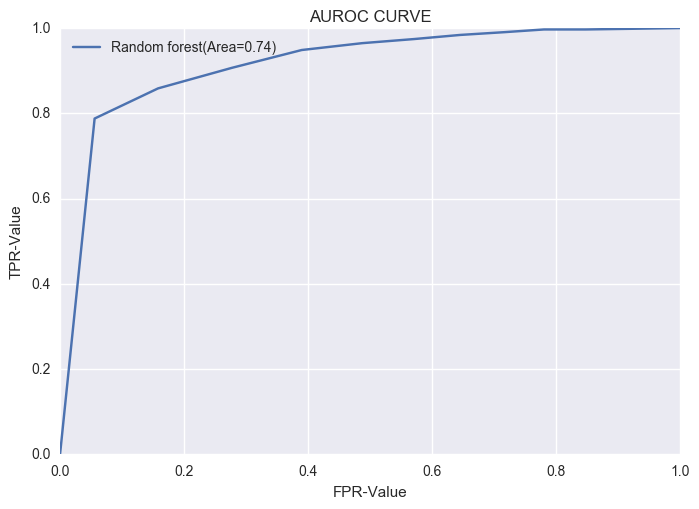

In [87]:

RFC.feature_importances_
top_35 = np.argpartition(RFC.feature_importances_, -35)[-35:]

cr_x3_train_1=cr_x3_train.iloc[:,top_35]
cr_x3_test_1=cr_x3_test.iloc[:,top_35]

RFC1 = RandomForestClassifier()

RFC1.fit(cr_x3_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = RFC1.predict(cr_x3_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = RFC1.predict_proba(cr_x3_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Random forest(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



C:\Users\amey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix = 
[[128498 128182]
 [    11    300]]
TPr =  0.9646302250803859
FPr =  0.4993844475611657
              precision    recall  f1-score   support

           0       1.00      0.50      0.67    256680
           1       0.00      0.96      0.00       311

    accuracy                           0.50    256991
   macro avg       0.50      0.73      0.34    256991
weighted avg       1.00      0.50      0.67    256991



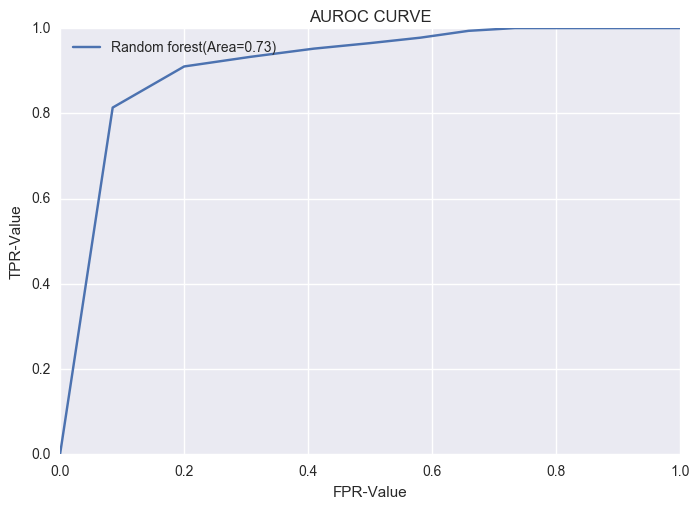

In [84]:

RFC.feature_importances_
top_30 = np.argpartition(RFC.feature_importances_, -30)[-30:]

cr_x3_train_1=cr_x3_train.iloc[:,top_30]
cr_x3_test_1=cr_x3_test.iloc[:,top_30]

RFC1 = RandomForestClassifier()

RFC1.fit(cr_x3_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = RFC1.predict(cr_x3_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = RFC1.predict_proba(cr_x3_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Random forest(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



C:\Users\amey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix = 
[[116034 140646]
 [     6    305]]
TPr =  0.9807073954983923
FPr =  0.54794296400187
              precision    recall  f1-score   support

           0       1.00      0.45      0.62    256680
           1       0.00      0.98      0.00       311

    accuracy                           0.45    256991
   macro avg       0.50      0.72      0.31    256991
weighted avg       1.00      0.45      0.62    256991



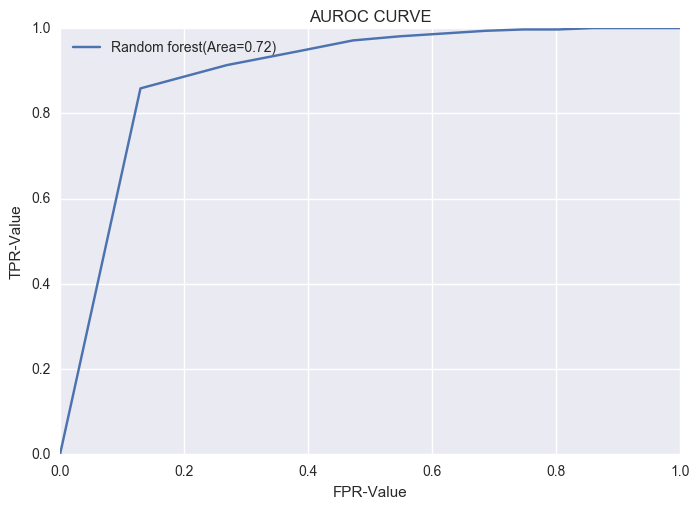

In [85]:

RFC.feature_importances_
top_25 = np.argpartition(RFC.feature_importances_, -25)[-25:]

cr_x3_train_1=cr_x3_train.iloc[:,top_25]
cr_x3_test_1=cr_x3_test.iloc[:,top_25]

RFC1 = RandomForestClassifier()

RFC1.fit(cr_x3_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = RFC1.predict(cr_x3_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = RFC1.predict_proba(cr_x3_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Random forest(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



C:\Users\amey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix = 
[[104745 151935]
 [     5    306]]
TPr =  0.9839228295819936
FPr =  0.5919237961664329
              precision    recall  f1-score   support

           0       1.00      0.41      0.58    256680
           1       0.00      0.98      0.00       311

    accuracy                           0.41    256991
   macro avg       0.50      0.70      0.29    256991
weighted avg       1.00      0.41      0.58    256991



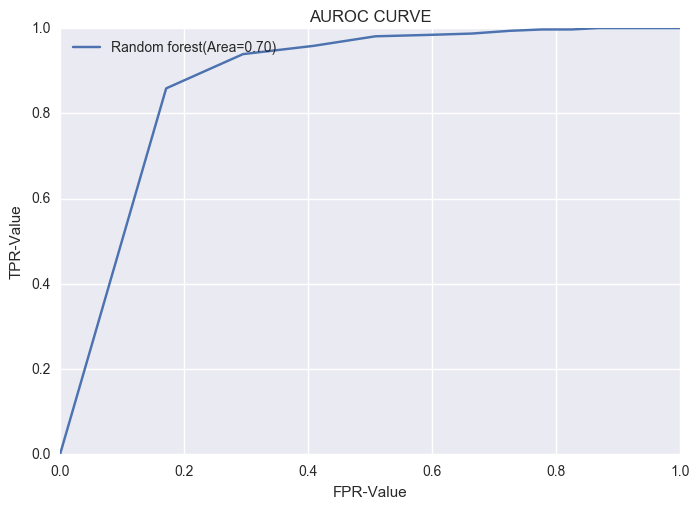

In [86]:

RFC.feature_importances_
top_20 = np.argpartition(RFC.feature_importances_, -20)[-20:]

cr_x3_train_1=cr_x3_train.iloc[:,top_20]
cr_x3_test_1=cr_x3_test.iloc[:,top_20]

RFC1 = RandomForestClassifier()

RFC1.fit(cr_x3_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = RFC1.predict(cr_x3_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = RFC1.predict_proba(cr_x3_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Random forest(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



In [ ]:

RFC.feature_importances_
top_10 = np.argpartition(RFC.feature_importances_, -10)[-10:]

cr_x3_train_1=cr_x3_train.iloc[:,top_10]
cr_x3_test_1=cr_x3_test.iloc[:,top_10]

RFC1 = RandomForestClassifier()

RFC1.fit(cr_x3_train_1,cr_y_train)


#### Prediction and Model evaluation

pred_value = RFC1.predict(cr_x3_test_1)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = RFC1.predict_proba(cr_x3_test_1)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Random forest(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



Naive Bias

Confusion Matrix = 
[[232453  24227]
 [    98    213]]
TPr =  0.684887459807074
FPr =  0.0943860059217703
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    256680
           1       0.01      0.68      0.02       311

    accuracy                           0.91    256991
   macro avg       0.50      0.80      0.48    256991
weighted avg       1.00      0.91      0.95    256991



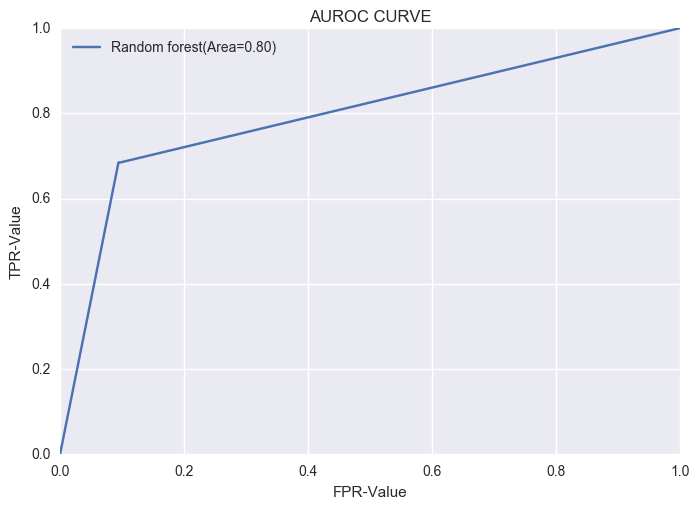

In [88]:

NB = MultinomialNB()

NB.fit(cr_x3_train,cr_y_train)

pred_value = NB.predict(cr_x3_test)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = NB.predict_proba(cr_x3_test)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Random forest(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



KNeighborsClassifier

In [ ]:

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(cr_x2_train,cr_y_train)


#### Prediction and Model evaluation

pred_value = knn.predict(cr_x2_test)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = knn.predict_proba(cr_x2_test)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="KNeighborsClassifier(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



Adaptive boosting

Confusion Matrix = 
[[120353 136327]
 [     8    303]]
TPr =  0.9742765273311897
FPr =  0.5311165653732274
              precision    recall  f1-score   support

           0       1.00      0.47      0.64    256680
           1       0.00      0.97      0.00       311

    accuracy                           0.47    256991
   macro avg       0.50      0.72      0.32    256991
weighted avg       1.00      0.47      0.64    256991



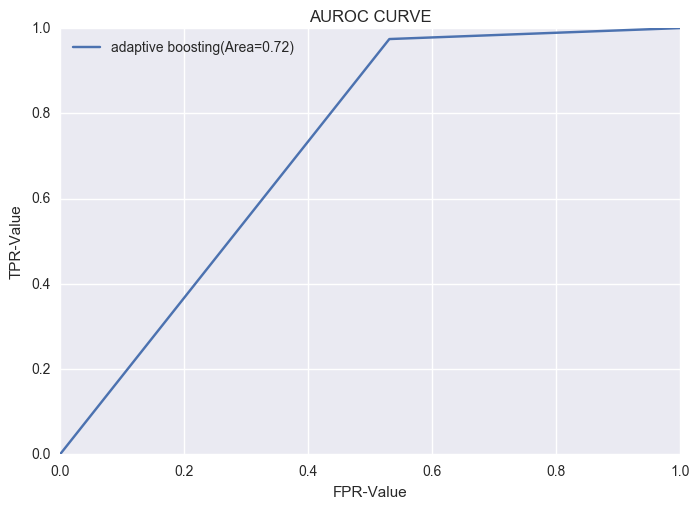

In [89]:

abc = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 15) 

abc.fit(cr_x3_train,cr_y_train)


#### Prediction and Model evaluation

pred_value = abc.predict(cr_x3_test)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = abc.predict_proba(cr_x3_test)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="adaptive boosting(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()



Voting classifier

In [90]:
# voting hard

logmodel = LogisticRegression()
dtree = DecisionTreeClassifier()
rfc = RandomForestClassifier()

vc = VotingClassifier(estimators = [("logmodel",logmodel),("dtree",dtree),("rfc",rfc)],voting='hard')

vc.fit(cr_x3_train,cr_y_train)


#### Prediction and Model evaluation

pred_value = vc.predict(cr_x3_test)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve



C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix = 
[[154024 102656]
 [    15    296]]
TPr =  0.9517684887459807
FPr =  0.3999376655758142
              precision    recall  f1-score   support

           0       1.00      0.60      0.75    256680
           1       0.00      0.95      0.01       311

    accuracy                           0.60    256991
   macro avg       0.50      0.78      0.38    256991
weighted avg       1.00      0.60      0.75    256991



0.7759154115850833

In [91]:
# voting soft

logmodel = LogisticRegression()
dtree = DecisionTreeClassifier()
rfc = RandomForestClassifier()

vc = VotingClassifier(estimators = [("logmodel",logmodel),("dtree",dtree),("rfc",rfc)],voting='soft')

vc.fit(cr_x3_train,cr_y_train)


#### Prediction and Model evaluation

pred_value = vc.predict(cr_x3_test)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))



C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix = 
[[154536 102144]
 [    18    293]]
TPr =  0.9421221864951769
FPr =  0.39794296400187
              precision    recall  f1-score   support

           0       1.00      0.60      0.75    256680
           1       0.00      0.94      0.01       311

    accuracy                           0.60    256991
   macro avg       0.50      0.77      0.38    256991
weighted avg       1.00      0.60      0.75    256991



Neural Networks

W0930 15:55:51.839166  4920 estimator.py:453] Using temporary folder as model directory: C:\Users\amey\AppData\Local\Temp\tmpo5tt8afb
W0930 15:55:52.133363  4920 data_feeder.py:283] float64 is not supported by many models, consider casting to float32.
W0930 15:55:52.696740  4920 head.py:2027] Casting <dtype: 'int32'> labels to bool.
W0930 15:55:52.860850  4920 head.py:2027] Casting <dtype: 'int32'> labels to bool.
W0930 15:55:52.979929  4920 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0930 15:55:53.020955  4920 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0930 15:55:57.703239  4920 data_feeder.py:283] float64 is not supported by many models, consider casting to float32.


Confusion Matrix = 
[[179437  77243]
 [    80    231]]
TPr =  0.7427652733118971
FPr =  0.30093112046127474


W0930 15:56:00.056809  4920 data_feeder.py:283] float64 is not supported by many models, consider casting to float32.


              precision    recall  f1-score   support

           0       1.00      0.70      0.82    256680
           1       0.00      0.74      0.01       311

    accuracy                           0.70    256991
   macro avg       0.50      0.72      0.41    256991
weighted avg       1.00      0.70      0.82    256991



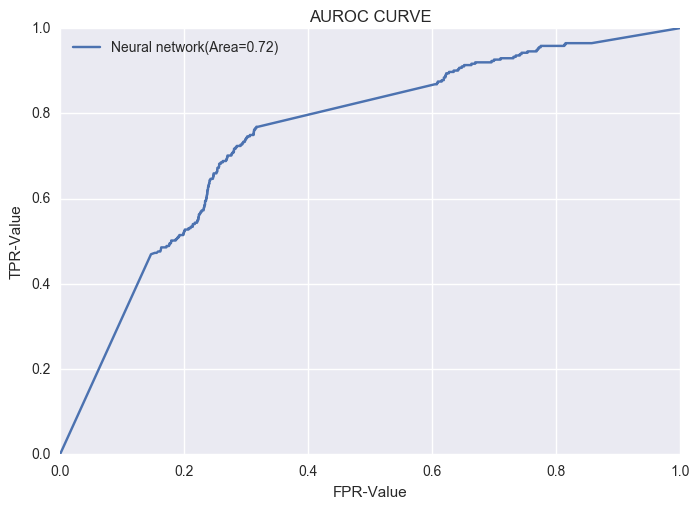

In [114]:

feature_columns = [tf.contrib.layers.real_valued_column("",dimension=1)]

classifier = learn.DNNClassifier(feature_columns=feature_columns,hidden_units=[10,20,10],n_classes=2)

cr_y_train = cr_y_train.astype(int)   # NN requires inputs in int format

classifier.fit(cr_x3_train,cr_y_train,steps=500,batch_size=32)    

#### Prediction and Model evaluation

pred_value = pd.DataFrame(classifier.predict(cr_x3_test))   # prediction

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = classifier.predict_proba(cr_x3_test)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Neural network(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()




W0930 15:57:28.601703  4920 estimator.py:453] Using temporary folder as model directory: C:\Users\amey\AppData\Local\Temp\tmp3fk3_f53
W0930 15:57:28.884893  4920 data_feeder.py:283] float64 is not supported by many models, consider casting to float32.
W0930 15:57:29.535327  4920 head.py:2027] Casting <dtype: 'int32'> labels to bool.
W0930 15:57:29.705441  4920 head.py:2027] Casting <dtype: 'int32'> labels to bool.
W0930 15:57:29.811510  4920 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0930 15:57:29.848536  4920 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0930 15:57:33.975354  4920 data_feeder.py:283] float64 is not supported by many models, consider casting to float32.


Confusion Matrix = 
[[256680      0]
 [   311      0]]
TPr =  0.0
FPr =  0.0


C:\Users\amey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
W0930 15:57:36.414982  4920 data_feeder.py:283] float64 is not supported by many models, consider casting to float32.


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.00      0.00      0.00       311

    accuracy                           1.00    256991
   macro avg       0.50      0.50      0.50    256991
weighted avg       1.00      1.00      1.00    256991



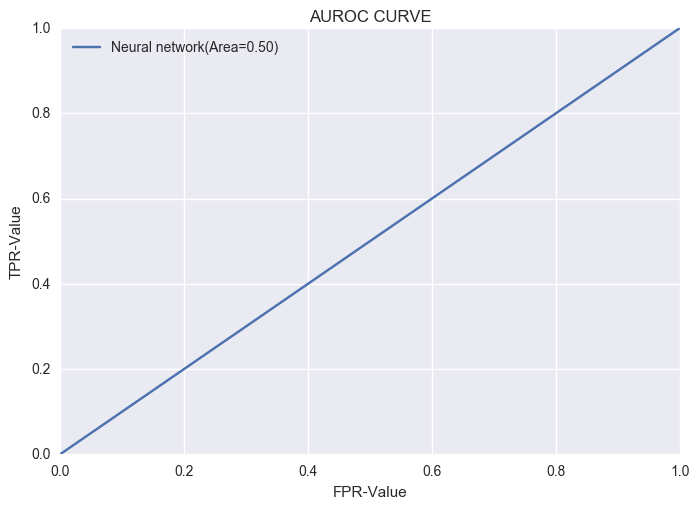

In [117]:

feature_columns = [tf.contrib.layers.real_valued_column("",dimension=1)]

classifier = learn.DNNClassifier(feature_columns=feature_columns,hidden_units=[10,20,20,10],n_classes=2)

cr_y_train = cr_y_train.astype(int)   # NN requires inputs in int format

classifier.fit(cr_x3_train,cr_y_train,steps=500,batch_size=32)    

#### Prediction and Model evaluation

pred_value = pd.DataFrame(classifier.predict(cr_x3_test))   # prediction

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = classifier.predict_proba(cr_x3_test)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="Neural network(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()




For set 3 NNs are not giving sensible results, so NNs are not good models for this particular data.

# Model Selection and interpretation of results

Throughout our analysis we have maintained the representation of confusion matrix as per sklearn documentation, which puts actual value along rows and predicted value along columns. Since we are using sklearn codes to evaluate models we also follow the sklearn documentation of inputing actual values and predicted values in that order . 
example : confusion_matrix(cr_y_test,pred_value).

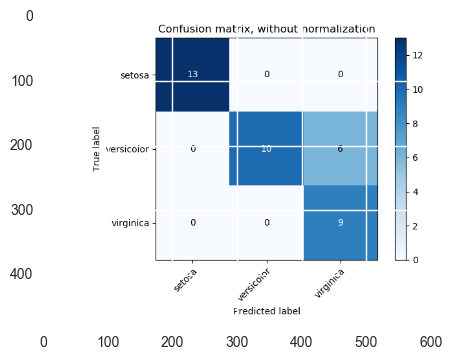

In [134]:
# Below is the confusion matrix according to the sklearn documentation
get_ipython().magic('matplotlib inline')
cf = img.imread(r"C:/Users/amey/Desktop/assign2/Confusion_matrix.png")
plt.imshow(cf)

The parameters we use for model evaluation and comparison are the following :

1. Accuracy - Accuaracy is fraction of total records predicted correctly. 

   Accuracy = TP+TN/TP+FP+FN+TN
   
2. Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.

   Precision = TP/TP+FP
   
3. Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual        class.
   
   Recall = TP/TP+FN
   
4. F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and        false negatives into account. F1 is usually more useful than accuracy, especially if you have an uneven class distribution.
   Hence F1 score is more important for our data that has high class imbalance.
   
   F1 Score = 2*(Recall * Precision) / (Recall + Precision)
   
5. ROC curve - A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic        ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the        true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. Basically ROC curve gives the      trade off between TPr and FPr. Area under ROC curve or AUROC is another measure of the model, whose value lies between 0 and    1 and closer the value to 1, better is the model.


    

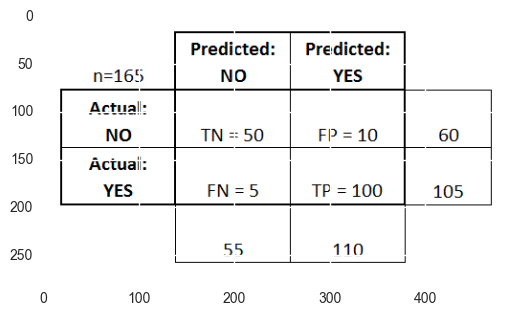

In [140]:
get_ipython().magic('matplotlib inline')
cf = img.imread(r"C:/Users/amey/Desktop/assign2/cf.png")
plt.imshow(cf)

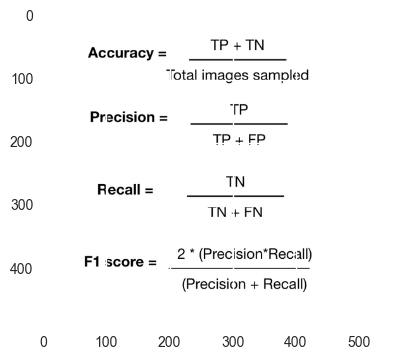

In [141]:
get_ipython().magic('matplotlib inline')
cf = img.imread(r"C:/Users/amey/Desktop/assign2/formulas.png")
plt.imshow(cf)

Based on there measures we conclude that the logistic regression model with 14 features is the best model. 
The model is the following.

C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Confusion Matrix = 
[[256565    115]
 [    63    248]]
TPr =  0.797427652733119
FPr =  0.00044802867383512545
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.68      0.80      0.74       311

    accuracy                           1.00    256991
   macro avg       0.84      0.90      0.87    256991
weighted avg       1.00      1.00      1.00    256991



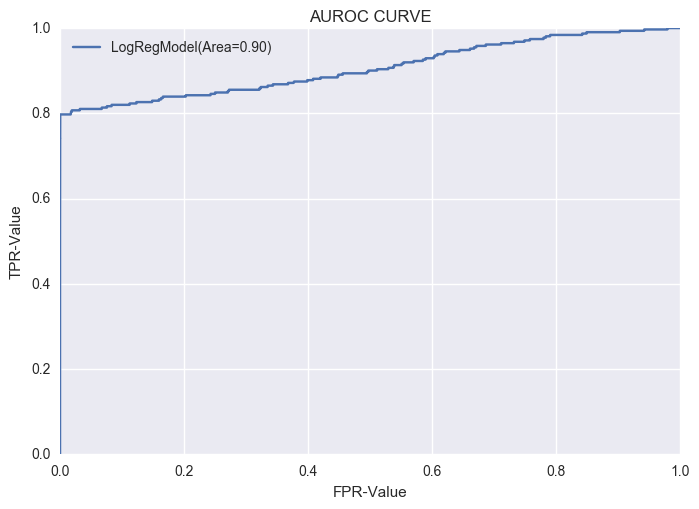

In [127]:
selector = RFE(logmodel, 14, step=1)
selector = selector.fit(cr_x2_train,cr_y_train)
selector.support_ 
xvars=list(cr_x2_train.columns)
sel_vars=[]
for i in range(0,len(selector.support_)) :
    if list(selector.support_)[i]==True :
        sel_vars.append(xvars[i]) 
sel_vars
cr_x2_train_2=cr_x2_train.loc[:,sel_vars]
cr_x2_test_2=cr_x2_test.loc[:,sel_vars]

logmodel1 = LogisticRegression()

logmodel1.fit(cr_x2_train_2,cr_y_train)


#### Prediction and Model evaluation

pred_value = logmodel1.predict(cr_x2_test_2)

cf = confusion_matrix(cr_y_test,pred_value)

print("Confusion Matrix = ")
print(cf)

print("TPr = ",cf[1,1]/(cf[1,1] + cf[1,0]))

print("FPr = ",cf[0,1]/(cf[0,1] + cf[0,0]))

print(classification_report(cr_y_test,pred_value))

roc_auc = roc_auc_score(cr_y_test,pred_value)

roc_auc   ### gives the value of area under the curve

pred_value = logmodel1.predict_proba(cr_x2_test_2)

pred_value = pd.DataFrame(pred_value)

pred_value = pred_value.iloc[:,1]

fpr, tpr, threshold = roc_curve(cr_y_test,pred_value)

plt.plot(fpr,tpr,label="LogRegModel(Area=%0.2f)" %roc_auc)
plt.xlabel("FPR-Value")
plt.ylabel("TPR-Value")
plt.legend(loc="upper left")
plt.title("AUROC CURVE")
plt.show()


Reasons why this model was selected :
1. High accuracy : The accuracy of the model is almost 100%.
2. Precision, recall and F1 score for class 0 are almost 1 and for class 1 are 0.68, 0.80, 0.74 respectively.
3. AUROC is 0.9.


Why is this model chosen despite possible overfitting with accuracy near 100% and a skewed AUROC ?
The answer to this question lies in very high class imbalance in the test data and in the overall data.

In [144]:
# Class imbalance in the whole data
cr.default_ind.value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

In [145]:
# Class imbalance in the test data
cr_y_test.value_counts()

0    256680
1       311
Name: default_ind, dtype: int64

So in the test data class imbalance is way more than that in the overall data. We cannot deal with it with under or over sampling
since it is test data. Also in the train data even if we do oversampling it is still not real data that can better train the 
model on records with diverse compositions. It is basically duplication of existing records. Although it is better than training 
on imbalenced data it is still not the actual training possible with real data. This is the reason why precision is high for 
class 0 and low for class1.

Despite near 100% accuracy this is not the case of overfitting because the class 1 which has precision of 68% is highly under 
represented in the test data. For every one record of class 1 there are around 1000 records of class 0 for which precision is
near 1. Accuracy would have been around 85% to 90% if the class imbalance was not there. Hence this huge class imbalance makes 
accuracy an unfit measure for final evaluation of a model for this problem. Though we have used it as a primary criteria.

Hence, precision, recall and f1-score should be used for final evaluation of the model in this problem. 

What makes our model a good model : 
1. Despite the order of magnitude under representation in the train data, precision is near 70% for class 1 while recall and f1 score are 0.80, 0.74 respectively.
Which are descent numbers.
2. These results are obtained with 14 variables which is a smaller number than 20, the model we started with for set 2 of model 
building.

Why logistic regression is a giving best results and not decision tree and random forest ?
The answer to this question lies in the nature of the x variables we are dealing with.

Most of variables are continuous. When variables are continuous the information entropy technique of splitting data becomes
less effective and hence decision tree doesn't give great results and so doesn't random forest.

# Making Business sense of the project

In [71]:
sel_vars  # x variables in the best model

['recoveries',
 'out_prncp',
 'out_prncp_inv',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'total_rec_prncp',
 'title',
 'total_pymnt_inv',
 'total_pymnt',
 'total_rec_int',
 'tot_coll_amt',
 'total_rec_late_fee',
 'funded_amnt_inv',
 'funded_amnt']

Let's explore different features. In the original data before sampling

In [93]:
# Let's see which x-variables in the best model have highest chi square score

In [134]:
# Splitting x variables and target variable
cr_xf = cr.loc[:,sel_vars]
test = SelectKBest(score_func = chi2, k = 'all')
fitted_cr = test.fit(cr_xf,cr_y)
print(fitted_cr.scores_)   # for each xvar we get a score. higher the score more important is the xvar
scores = fitted_cr.scores_.tolist()
cr_xf.columns   # list of the column names

[7.02191231e+08 3.77726777e+08 3.77569208e+08 7.38319230e+07
 6.92298240e+07 5.32163754e+07 5.29430519e+07 1.13018308e+07
 1.07622836e+07 4.48191674e+06 2.49689576e+06 6.91474487e+05
 2.78564495e+05 1.38398843e+05]


Index(['recoveries', 'out_prncp', 'out_prncp_inv', 'collection_recovery_fee',
       'last_pymnt_amnt', 'total_rec_prncp', 'title', 'total_pymnt_inv',
       'total_pymnt', 'total_rec_int', 'tot_coll_amt', 'total_rec_late_fee',
       'funded_amnt_inv', 'funded_amnt'],
      dtype='object')

In [135]:
# To get the list of variables with most score 
features = {"feature" : cr_xf.columns, "scores" : scores}
features = pd.DataFrame(features)
features.sort_values(['scores'],ascending=False)

,feature,scores
0,recoveries,7.021912e+08
1,out_prncp,3.777268e+08
2,out_prncp_inv,3.775692e+08
3,collection_recovery_fee,7.383192e+07
4,last_pymnt_amnt,6.922982e+07
5,total_rec_prncp,5.321638e+07
6,title,5.294305e+07
7,total_pymnt_inv,1.130183e+07
8,total_pymnt,1.076228e+07
9,total_rec_int,4.481917e+06


Hence most important x variable is recoveries i.e. post charge off gross recovery. 
A charge-off is a debt, for example on a credit card, that is deemed unlikely to be collected by the creditor because the borrower has become substantially delinquent after a period of time. However, a charge-off does not mean a write-off of the debt entirely. 

In [162]:
cr.groupby('default_ind').recoveries.agg(['count','min','max','mean','std'])

,count,min,max,mean,std
default_ind,,,,,
0,809502,0.0,0.00,0.000000,0.00000
1,46467,0.0,33520.27,867.436067,1559.67106


So we see a trend that post charge off gross recovery is zero for non default records as post charge off gross recovery increases the likelihood of default increases.

In [171]:
cr.groupby('default_ind').out_prncp.agg(['count','min','max','mean','std'])

,count,min,max,mean,std
default_ind,,,,,
0,809502,0.0,49372.86,8742.935227,8459.681842
1,46467,0.0,35000.00,304.179196,2219.353977


So we see that mean Remaining outstanding principal for total amount funded is significantly less for default records as compared to non defaults. 

In [172]:
cr.groupby('default_ind').collection_recovery_fee.agg(['count','min','max','mean','std'])

,count,min,max,mean,std
default_ind,,,,,
0,809502,0.0,0.00,0.000000,0.000000
1,46467,0.0,7002.19,91.206597,253.065131


Hence as post charge off collection fee crosses 7000 we see higher likelihood of default.

In [173]:
cr.groupby('default_ind').last_pymnt_amnt.agg(['count','min','max','mean','std'])

,count,min,max,mean,std
default_ind,,,,,
0,809502,0.0,36475.59,2327.64342,4981.150682
1,46467,0.0,34833.35,454.99824,650.022043


This chart tells us that the last payment amount for defaulters was way less than for non defaulters. Hence it would be a good 
idea to get concerned as the last payment amount falls drastically. 

In [174]:
cr.groupby('default_ind').total_rec_prncp.agg(['count','min','max','mean','std'])

,count,min,max,mean,std
default_ind,,,,,
0,809502,0.0,35000.03,5995.340518,6791.620752
1,46467,0.0,34483.27,3333.515304,3292.831378


This a sensible insight that the Principal received to date was almost double for non defaulters as for the defaulters.

In [186]:
cr3 = cr_back[cr_back.default_ind==1]
cr3.title.value_counts()[0:3]

Debt consolidation         14158
Credit card refinancing     3910
Debt Consolidation          1881
Name: title, dtype: int64

Hence, the loans under the titles 'Debt consolidation','Credit card refinancing' , and 'Debt Consolidation' are most likely to end in default, particularly 'Debt consolidation'. Hence it would be a good idea to have greater checks and balances for these categories and also closer monitoring of repayment would be a desirable.

These are the six key insights we would like to recommend for this business problem. Insights could be derived from every x variable based on which values were present in default records, but based on our analysis these are the insights that we think are most impactful in predicting whether a loan will end in a default. 